# **Entregable 2: Razonamiento Aproximado basado en lógica difusa.**

- **Asignatura:** Conocimiento y Razonamiento Aproximado
- **Autores:** Ana Gil Molina, José María García Ortiz y Francisco
José Herrera Zapata
- **Fecha:** 10 de noviembre de 2024


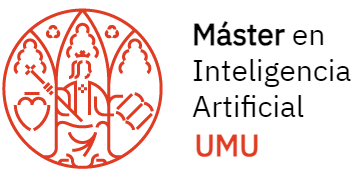

``Instalación de librerías``

In [ ]:
!pip install scikit-fuzzy

In [ ]:
!pip install unidecode

In [ ]:
! pip install ipywidgets

In [ ]:
! pip install mpld3

``Importación de librerías``

In [ ]:
# Librerías necesarias
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
from google.colab import drive
import os
import shutil
import gdown
import zipfile
import cv2
import geopandas as gpd
import pandas as pd
from unidecode import unidecode
import glob
import matplotlib as mpl
import mpld3

``Descarga de imágenes desde google drive``

In [ ]:
''' Solamente cargamos aquí los ficheros relativos al mapa como tal y la leyenda de colores elegida. Los ficheros con datos climáticos y geográficos han de ser aportados por el usuario a través
    de la interfaz gráfica desarrollada en la sección 'Propuesta de aplicación' '''


# IDs de los archivos compartidos
file_ids = ['1miCIUMG3wVI-FdGHF4jzcLZzXuitybpH', '1fFreA8kDUXA4btJr_H3XkF4owahALDbj', '1jcPEEtqIK7HEon0MBz2WPHfLy1G0nCcB', '1Y6DGQ3ym83gaNN8nn_soPGB6lPQcsZ_u','1f5S0XPfmdVhcDa8o7focPgaPw1jrmSTR']

# Nombres locales para los archivos descargados y descomprimidos
download_paths = ['/CRA.zip', '/DATOS-GEOGRAFICOS.zip', '/DATOS-CLIMATICOS.zip', '/IGN.zip', '/Fotos_CRA.zip']
extract_paths = ['','','','','']

# Descargar y descomprimir cada archivo
for file_id, download_path, extract_path in zip(file_ids, download_paths, extract_paths):
    # Descargar archivo
    gdown.download(f'https://drive.google.com/uc?id={file_id}', download_path, quiet=False)

    # Descomprimir el archivo ZIP
    with zipfile.ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
        print(f"Archivos descomprimidos en '{extract_path}'")

## **Práctica 1: Conjuntos Difusos y Variables Lingüísticas**



En esta primera práctica, se presenta el modelo de Holdridge, un sistema de zonificación ecológica que identifica unidades bioclimáticas (zonas de vida), es decir, regiones biogeográficas delimitadas por parámetros climáticos. Este es un esquema para la clasificación de las diferentes áreas terrestres según su comportamiento global bioclimático. Para comenzar a implementar dicho modelo, en esta práctica se pide modelar diferentes variables lingüísticas que serán de utilidad en las siguientes prácticas. Para ello, para cada una de las variables solicitadas, definimos:
- Su nombre
- Su abreviatura
- Su rango (valores que puede tomar dicha variable en general)
- Su unidad de medida
- Su universo de discurso (valores que puede tomar dicha variable en el contexto del modelo de Holdridge)
- Sus valores lingüísticos
- Sus etiquetas
- Sus funciones de pertenencia

Para llevar esto a cabo, usaremos la librería `skfuzzy` de Python. Esta librería permite trabajar con lógica difusa de manera eficiente y proporciona herramientas para crear sistemas de inferencia difusa. En particular, se utilizarán sus funcionalidades para definir las variables lingüísticas y sus funciones de pertenencia, las cuales son esenciales para modelar las relaciones imprecisas que definen las zonas de vida en el modelo de Holdridge. Además, permite visualizar las funciones de pertenencia de manera clara y entender cómo se distribuyen los valores a lo largo de los universos de discurso de las variables.

### **Ratio de Evapotranspiración Potencial \(RETP\)**

La RETP puede estimarse como el cociente entre la evapotranspiración potencial media anual (ETP) y la precipitación media anual (PP) donde la evapotranspiración potencial (ETP) es la cantidad de agua máxima que puede evaporar y transpirar un ecosistema por unidad de superficie.

* $RETP = ETP / PP$
* $RETP < 1$ en regiones húmedas, $RETP > 1$ en regiones secas
* Rango: $RETP \in \mathbb{R}_+$
* Al ser el cociente entre ETP y PP, el RETP no tiene unidades de medida
* Universo de discurso: $U = [0,64]$



In [ ]:
# Definir el universo para la variable difusa RETP
universo_RETP = np.arange(0, 64.01, 0.001)
RETP = ctrl.Antecedent(universo_RETP, 'RETP')

# Asignar las funciones de pertenencia a los valores lingüísticos de RETP
RETP['subsaturado'] = fuzz.trapmf(universo_RETP, [0, 0.03125, 0.05625, 0.075])
RETP['semisaturado'] = fuzz.trapmf(universo_RETP, [0.05625, 0.075, 0.1125, 0.15])
RETP['superhumedo'] = fuzz.trapmf(universo_RETP, [0.1125, 0.15, 0.225, 0.3])
RETP['perhumedo'] = fuzz.trapmf(universo_RETP, [0.225, 0.3, 0.45, 0.6])
RETP['humedo'] = fuzz.trapmf(universo_RETP, [0.45, 0.6, 0.9, 1.2])
RETP['subhumedo'] = fuzz.trapmf(universo_RETP, [0.9, 1.2, 1.8, 2.4])
RETP['semiarido'] = fuzz.trapmf(universo_RETP, [1.8, 2.4, 3.6, 4.8])
RETP['arido'] = fuzz.trapmf(universo_RETP, [3.6, 4.8, 7.2, 9.6])
RETP['perarido'] = fuzz.trapmf(universo_RETP, [7.2, 9.6, 14.4, 19.2])
RETP['superarido'] = fuzz.trapmf(universo_RETP, [14.4, 19.2, 32, 64])

# Establecer las etiquetas de los valores lingüísticos de RETP
labels = ["subsaturado", "semisaturado", "superhumedo", "perhumedo", "humedo", "subhumedo", "semiarido", "arido", "perarido", "superarido"]

In [ ]:
# Graficar las provincias de humedad
for label in RETP.terms:
    plt.plot(universo_RETP, RETP[label].mf, label=label)

# Etiquetas y título
plt.title('RETP')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
# Valores a evaluar
valores = [0.5, 3, 8.3, 16, 20]

# Calcular el grado de pertenencia para cada valor de RETP en cada conjunto difuso
pertenencia = [[fuzz.interp_membership(universo_RETP, RETP[label].mf, x) for label in RETP.terms] for x in valores]

# Mostrar los resultados
for i, valor in enumerate(valores):
    print(f"Grados de pertenencia para RETP = {valor}:")
    for j, label in enumerate(RETP.terms):
        print(f"  {label}: {pertenencia[i][j]:.4f}")

In [ ]:
# Crear gráficos separados para cada conjunto difuso y su negación
for label in RETP.terms:
    # Obtener la función de membresía
    membership_function = RETP[label].mf

    # Calcular el complemento
    membership_function_comp = fuzz.fuzzy_not(membership_function)

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(universo_RETP, membership_function, label=label)
    plt.plot(universo_RETP, membership_function_comp, color='r', label=f'negación de {label}')

    # Etiquetas y título
    plt.title(f'Función de Pertenencia y Negación de {label}')
    plt.xlabel('Universo')
    plt.ylabel('Grado de Pertenencia')
    plt.xscale(value="log")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

In [ ]:
# Graficar las uniones entre funciones consecutivas en gráficos separados
for i in range(len(labels) - 1):
    # Calcular la unión de las funciones de pertenencia
    union = fuzz.fuzzy_or(universo_RETP, RETP[labels[i]].mf, universo_RETP, RETP[labels[i + 1]].mf)[1]

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(universo_RETP, union, label=f'{labels[i]} ∪ {labels[i + 1]}')

    # Etiquetas y título
    plt.title(f'Unión entre {labels[i]} y {labels[i + 1]}')
    plt.xlabel('Universo RETP')
    plt.ylabel('Grado de Pertenencia')
    plt.xscale('log')
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

In [ ]:
# Graficar las intersecciones entre funciones de pertenencia consecutivas asociadas a las etiquetas de RETP
for i in range(len(labels) - 1):
    interseccion = fuzz.fuzzy_and(universo_RETP, RETP[labels[i]].mf, universo_RETP, RETP[labels[i + 1]].mf)[1]
    plt.plot(universo_RETP, interseccion, label=f'{labels[i]} ∧ {labels[i+1]}')

plt.title('Intersecciones entre conjuntos difusos contiguos')
plt.xlabel('Universo RETP')
plt.ylabel('Grado de Pertenencia')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

### **Precipitación \(PP\)**

Se entiende por Precipitación (PP) a la humedad condensada que cae de la atmósfera sobre la superficie de la tierra bajo diferentes formas, como llovizna, chubasco, nieve, granizo, niebla, rocío, etc.

* Rango: $PP \in \mathbb{R}_+$
* Unidades de medida: mm
* Universo de discurso: $U = [0,16000]$

In [ ]:
# Definir el universo de la precipitación
universo_PP = np.arange(0, 16001, 5)

# Definir la variable difusa para PP
PP = ctrl.Antecedent(universo_PP, 'PP')

# Definir las funciones de pertenencia para PP
PP['subsuperarido'] = fuzz.trapmf(universo_PP, [0, 12.5, 60, 75])    # Añadida, en la figura no tiene nombre
PP['superarido'] = fuzz.trapmf(universo_PP, [60, 75, 112.5, 150])
PP['perarido'] = fuzz.trapmf(universo_PP, [112.5, 150, 225, 300])
PP['arido'] = fuzz.trapmf(universo_PP, [225, 300, 450, 600])
PP['semiarido'] = fuzz.trapmf(universo_PP, [450, 600, 900, 1200])
PP['subhumedo'] = fuzz.trapmf(universo_PP, [900, 1200, 1800, 2400])
PP['humedo'] = fuzz.trapmf(universo_PP, [1800, 2400, 3600, 4800])
PP['perhumedo'] = fuzz.trapmf(universo_PP, [3600, 4800, 7200, 9600])
PP['superhumedo'] = fuzz.trapmf(universo_PP, [7200, 9600, 14400, 16000])

# Las categorías "semisaturado" y "subsaturado" se salen del universo de la variable PP

In [ ]:
# Graficar
for label in PP.terms:
    plt.plot(universo_PP, PP[label].mf, label=label)

# Etiquetas y título
plt.title('PP')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.xscale(value="log")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### **Biotemperatura \(BT\)**

La Biotemperatura (BT) es la temperatura del aire, que determina el ritmo e intensidad de los procesos fisiológicos de las plantas (fotosíntesis de las plantas, respiración y transpiración) y la tasa de evaporación directa del agua contenida en el suelo y la vegetación.

* Rango: $BT \in [-30,80]$
* Unidades de medida: °C
* Universo de discurso: $U = [0,30]$



In [ ]:
# Definir el universo de la biotemperatura
universo_BT = np.arange(0, 30.1, 0.1)

# Definir la variable difusa para BT
BT = ctrl.Consequent(universo_BT, 'BT_c')

# Definir las funciones de pertenencia para BT
BT['muy_baja'] = fuzz.trapmf(universo_BT, [0, 0.3, 1.2, 1.8])
BT['baja'] = fuzz.trapmf(universo_BT, [1.2, 1.8, 2.7, 3.6])
BT['moderadamente_baja'] = fuzz.trapmf(universo_BT, [2.7, 3.6, 5.4, 7.2])
BT['moderada'] = fuzz.trapmf(universo_BT, [5.4, 7.2, 10.8, 13.2])
BT['moderadamente_alta'] = fuzz.trapmf(universo_BT, [10.8, 13.2, 16.8, 19.2])
BT['alta'] = fuzz.trapmf(universo_BT, [16.8, 19.2, 22.8, 25.2])
BT['muy_alta'] = fuzz.trapmf(universo_BT, [22.8, 25.2, 28.8, 30])

In [ ]:
# Graficamos las funciones de pertenencia a las distintas etiquetas de biotemperatura
for label in BT.terms:
    plt.plot(universo_BT, BT[label].mf, label=label)

# Etiquetas y título
plt.title('BT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### **Latitud \(LAT\)**

La Latitud (LAT) es la distancia angular que hay entre un punto de la superficie de la tierra y el Ecuador. Se mide de 0° en el Ecuador hasta 90° hacia el Polo Norte y hacia el Polo Sur. De forma más precisa, es el ángulo formado desde el centro de la Tierra hasta el Ecuador y un lugar sobre la superficie terrestre.

- Rango: $LAT \in [-90,90]$
- Unidades de medida: °
- Universo de discurso: $U = [0,90]$ \(para latitudes negativas es equivalente\)

In [ ]:
# Definir el universo de latitudes (de 0 a 90 grados)
universo_LAT = np.arange(0, 91, 0.1)

# Definir la variable difusa para latitud
LAT = ctrl.Antecedent(universo_LAT, 'LAT')

# Definir las funciones de pertenencia para LAT usando referencias geográficas con solapamiento
LAT['polar']     = fuzz.trapmf(universo_LAT, [67.1, 72.4, 90, 90])
LAT['subpolar']     = fuzz.trapmf(universo_LAT, [61.9, 64.4, 67.1, 72.4])
LAT['boreal']     = fuzz.trapmf(universo_LAT, [53.6, 58.1, 61.9, 64.4])
LAT['templado_frio']  = fuzz.trapmf(universo_LAT, [39.1, 44.9, 53.6, 58.1])
LAT['templado_calido']  = fuzz.trapmf(universo_LAT, [24.6, 30.4, 39.1, 44.9])
LAT['subtropical']  = fuzz.trapmf(universo_LAT, [10.4, 15.9, 24.6, 30.4])
LAT['tropical']  = fuzz.trapmf(universo_LAT, [0, 0, 10.4, 15.9])

In [ ]:
# Graficamos las funciones de pertenencia a las distintas etiquetas de Latitud
for label in LAT.terms:
    plt.plot(universo_LAT, LAT[label].mf, label=label)

# Etiquetas y título
plt.title('LAT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### **Altitud \(ALT\)**

La Altitud (ALT) es la distancia vertical de un punto de la Tierra con respecto al nivel del mar.

* Rango: $ALT \in [0,8849]$
* Unidades de medida: m
* Universo de discurso: $U = [0,5000]$

In [ ]:
# Definir el universo de la altitud (ALT)
universo_ALT = np.arange(0, 5001, 1)  # Desde 0 m (nivel del mar) hasta 5000 m

# Definir la variable difusa para ALT
ALT = ctrl.Antecedent(universo_ALT, 'ALT')

# Definir las funciones de pertenencia para ALT
ALT['extremadamente_baja'] = fuzz.trapmf(universo_ALT, [0, 0, 400, 600])
ALT['muy_baja'] = fuzz.trapmf(universo_ALT, [400, 600, 900, 1200])
ALT['baja'] = fuzz.trapmf(universo_ALT, [900, 1200, 1800, 2200])
ALT['moderada'] = fuzz.trapmf(universo_ALT, [1800, 2200, 2800, 3200])
ALT['alta'] = fuzz.trapmf(universo_ALT, [2800, 3200, 3800, 4100])
ALT['muy_alta'] = fuzz.trapmf(universo_ALT, [3800, 4100, 4400, 4700])
ALT['extremadamente_alta'] = fuzz.trapmf(universo_ALT, [4400, 4700, 5000, 5000])

In [ ]:
# Graficamos las funciones de pertenencia a las distintas etiquetas de altitud
for label in ALT.terms:
    plt.plot(universo_ALT, ALT[label].mf, label=label)

# Etiquetas y título
plt.title('ALT')
plt.xlabel('Universo')
plt.ylabel('Grado de Pertenencia')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

## **Práctica 2: Reglas si\-entonces**

### **Relación entre latitud, altitud y biotemperatura como reglas IF\-THEN**

Hay varias formas de estimar la biotemperatura según la información disponible. Por ejemplo, cuando no tenemos datos de temperatura podemos aproximarla en base a la latitud y la altitud de la zona que estamos estudiando. En latitudes bajas o tropicales las zonas son cálidas, con biotemperaturas altas, predominando climas húmedos o tropicales. En latitudes medias (zona subtropical o templada) los climas son más moderados dando lugar a bosques templados y praderas. En latitudes altas (polar o boreal), el clima es frío y dominan los ecosistemas boreales o tundras, debido a la baja biotemperatura. Además, los ecosistemas cambian a medida que aumenta la altitud. En lugares de mayor altitud, las condiciones climáticas se asemejan a las de latitudes más altas, incluso si el lugar está cerca del ecuador. Es decir, conforme ascendemos en altitud, los ecosistemas pasan de tropicales a templados y finalmente a tundras, de manera similar a lo que ocurre con el cambio de latitudes de baja a alta.

Conociendo esta relación entre latitud, altitud y temperatura, en esta sección se implementan una serie de reglas IF-THEN basadas en proposiciones difusas compuestas que modelan la relación. Para la implementación en Python, se utiliza el método `control` de la librería `skfuzzy`.

IF `LAT` is polar AND `ALT` is extremadamente baja THEN `BT` is muy baja.

In [ ]:
ruleLA1 = ctrl.Rule(LAT['polar'] & ALT['extremadamente_baja'], BT['muy_baja'])

IF `LAT` is subpolar AND `ALT` is extremadamente baja THEN `BT` is baja.

In [ ]:
ruleLA2 = ctrl.Rule(LAT['subpolar'] & ALT['extremadamente_baja'], BT['baja'])

IF `LAT` is subpolar AND `ALT` is muy baja THEN `BT` is muy baja.

In [ ]:
ruleLA3 = ctrl.Rule(LAT['subpolar'] & ALT['muy_baja'], BT['muy_baja'])

IF `LAT` is boreal AND `ALT` is extremadamente baja THEN `BT` is moderadamente baja.

In [ ]:
ruleLA4 = ctrl.Rule(LAT['boreal'] & ALT['extremadamente_baja'], BT['moderadamente_baja'])

IF `LAT` is boreal AND `ALT` is muy baja THEN `BT` is baja.

In [ ]:
ruleLA5 = ctrl.Rule(LAT['boreal'] & ALT['muy_baja'], BT['baja'])

IF `LAT` is boreal AND `ALT` is baja THEN `BT` is muy baja.

In [ ]:
ruleLA6 = ctrl.Rule(LAT['boreal'] & ALT['moderada'], BT['muy_baja'])

IF `LAT` is templado frío AND `ALT` is extremadamente baja THEN `BT` is moderada.

In [ ]:
ruleLA7 = ctrl.Rule(LAT['templado_frio'] & ALT['extremadamente_baja'], BT['moderada'])

IF `LAT` is templado frío AND `ALT` is muy baja THEN `BT` is moderadamente baja.

In [ ]:
ruleLA8 = ctrl.Rule(LAT['templado_frio'] & ALT['muy_baja'], BT['moderadamente_baja'])

IF `LAT` is templado frío AND `ALT` is baja THEN `BT` is baja.

In [ ]:
ruleLA9 = ctrl.Rule(LAT['templado_frio'] & ALT['baja'], BT['baja'])

IF `LAT` is templado frío AND `ALT` is moderada THEN `BT` is muy baja.

In [ ]:
ruleLA10 = ctrl.Rule(LAT['templado_frio'] & ALT['moderada'], BT['muy_baja'])

IF `LAT` is templado cálido AND `ALT` is extremadamente baja THEN `BT` is moderadamente alta.

In [ ]:
ruleLA11 = ctrl.Rule(LAT['templado_calido'] & ALT['extremadamente_baja'], BT['moderadamente_alta'])

IF `LAT` is templado cálido AND `ALT` is muy baja THEN `BT` is moderada.

In [ ]:
ruleLA12 = ctrl.Rule(LAT['templado_calido'] & ALT['muy_baja'], BT['moderada'])

IF `LAT` is templado cálido AND `ALT` is baja THEN `BT` is moderadamente baja.

In [ ]:
ruleLA13 = ctrl.Rule(LAT['templado_calido'] & ALT['baja'], BT['moderadamente_baja'])

IF `LAT` is templado cálido AND `ALT` is moderada THEN `BT` is baja.

In [ ]:
ruleLA14 = ctrl.Rule(LAT['templado_calido'] & ALT['moderada'], BT['baja'])

IF `LAT` is templado cálido AND `ALT` is alta THEN `BT` is muy baja.

In [ ]:
ruleLA15 = ctrl.Rule(LAT['templado_calido'] & ALT['alta'], BT['muy_baja'])

IF `LAT` is subtropical AND `ALT` is extremadamente baja THEN `BT` is alta.

In [ ]:
ruleLA16 = ctrl.Rule(LAT['subtropical'] & ALT['extremadamente_baja'], BT['alta'])

IF `LAT` is subtropical AND `ALT` is muy baja THEN `BT` is moderadamente alta.

In [ ]:
ruleLA17 = ctrl.Rule(LAT['subtropical'] & ALT['muy_baja'], BT['moderadamente_alta'])

IF `LAT` is subtropical AND `ALT` is baja THEN `BT` is moderada.

In [ ]:
ruleLA18 = ctrl.Rule(LAT['subtropical'] & ALT['baja'], BT['moderada'])

IF `LAT` is subtropical AND `ALT` is moderada THEN `BT` is moderadamente baja.

In [ ]:
ruleLA19 = ctrl.Rule(LAT['subtropical'] & ALT['moderada'], BT['moderadamente_baja'])

IF `LAT` is subtropical AND `ALT` is alta THEN `BT` is baja.

In [ ]:
ruleLA20 = ctrl.Rule(LAT['subtropical'] & ALT['alta'], BT['baja'])

IF `LAT` is subtropical AND `ALT` is muy alta THEN `BT` is muy baja.

In [ ]:
ruleLA21 = ctrl.Rule(LAT['subtropical'] & ALT['muy_alta'], BT['muy_baja'])

IF `LAT` is tropical AND `ALT` is extremadamente baja THEN `BT` is muy alta.

In [ ]:
ruleLA22 = ctrl.Rule(LAT['tropical'] & ALT['extremadamente_baja'], BT['muy_alta'])

IF `LAT` is tropical AND `ALT` is muy baja THEN `BT` is alta.

In [ ]:
ruleLA23 = ctrl.Rule(LAT['tropical'] & ALT['muy_baja'], BT['alta'])

IF `LAT` is tropical AND `ALT` is baja THEN `BT` is moderadamente alta.

In [ ]:
ruleLA24 = ctrl.Rule(LAT['tropical'] & ALT['baja'], BT['moderadamente_alta'])

IF `LAT` is tropical AND `ALT` is moderada THEN `BT` is moderada.

In [ ]:
ruleLA25 = ctrl.Rule(LAT['tropical'] & ALT['moderada'], BT['moderada'])

IF `LAT` is tropical AND `ALT` is alta THEN `BT` is moderadamente baja.

In [ ]:
ruleLA26 = ctrl.Rule(LAT['tropical'] & ALT['alta'], BT['moderadamente_baja'])

IF `LAT` is tropical AND `ALT` is muy alta THEN `BT` is baja.

In [ ]:
ruleLA27 = ctrl.Rule(LAT['tropical'] & ALT['muy_alta'], BT['baja'])

IF `LAT` is tropical AND `ALT` is extremadamente alta THEN `BT` is muy baja.

In [ ]:
ruleLA28 = ctrl.Rule(LAT['tropical'] & ALT['extremadamente_alta'], BT['muy_baja'])

Una vez definidas todas las reglas IF-THEN, se incorporan en un sistema de inferencia difusa:

In [ ]:
# Crear el sistema de control
control_system_BT = ctrl.ControlSystem([ruleLA1, ruleLA2, ruleLA3, ruleLA4, ruleLA5, ruleLA6, ruleLA7, ruleLA8,
                                    ruleLA9, ruleLA10, ruleLA11, ruleLA12, ruleLA13, ruleLA14, ruleLA15,
                                    ruleLA16, ruleLA17, ruleLA18, ruleLA19, ruleLA20, ruleLA21, ruleLA22,
                                    ruleLA23, ruleLA24, ruleLA25, ruleLA26, ruleLA27, ruleLA28])

# Crear simulador del sistema de control
simulador_BT = ctrl.ControlSystemSimulation(control_system_BT)

### **DOF de las reglas**

En este apartado, se calcula el DOF (grado de satisfacción) de algunas de las reglas definidas. Este se define como:

$ DOF(A', A) = \beta(x) = \sup_{x \in X} \left( \mu_{A'}(x) \ast \mu_{A}(x) \right) $

En este caso, el operador * corresponde a la t-norma, que en el contexto de la lógica difusa y, específicamente, usando la implicación de Mandami, se define como el mínimo entre los valores de pertenencia de los conjuntos A' y A. Por lo tanto, la fórmula se simplifica a:

$ DOF(A', A) = \sup_{x \in X} \left( \min \left( \mu_{A'}(x), \mu_{A}(x) \right) \right) $

En nuestro caso particular, como nuestros nuevos conjuntos difusos van a ser singleton, tendremos:

$ DOF(A, x_0) = \mu_A(x_0) $

Además, dado que en el sistema de inferencia difusa tenemos varios antecedentes (las condiciones de las reglas), que están unidos mediante un operador AND, el DOF total de una regla se calcula tomando el mínimo de los DOF de cada antecedente.

IF `LAT` is polar AND `ALT` is extremadamente baja THEN `BT` is muy baja.

In [ ]:
# Valores de entrada
valor_LAT = 70
valor_ALT = 100

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['polar'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['extremadamente_baja'].mf, valor_ALT)

DOF_rule1 = min(grado_LAT, grado_ALT)
DOF_rule1

IF `LAT` is subpolar AND `ALT` is extremadamente baja THEN `BT` is baja.

In [ ]:
# Valores de entrada
valor_LAT = 65
valor_ALT = 450

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['subpolar'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['extremadamente_baja'].mf, valor_ALT)

DOF_rule2 = min(grado_LAT, grado_ALT)
DOF_rule2

IF `LAT` is subpolar AND `ALT` is muy baja THEN `BT` is muy baja.

In [ ]:
# Valores de entrada
valor_LAT = 65
valor_ALT = 450

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['subpolar'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['muy_baja'].mf, valor_ALT)

DOF_rule3 = min(grado_LAT, grado_ALT)
DOF_rule3

IF `LAT` is boreal AND `ALT` is extremadamente baja THEN `BT` is moderadamente baja.

In [ ]:
# Valores de entrada
valor_LAT = 55
valor_ALT = 200

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['boreal'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['extremadamente_baja'].mf, valor_ALT)

DOF_rule4 = min(grado_LAT, grado_ALT)
DOF_rule4

IF `LAT` is boreal AND `ALT` is muy baja THEN `BT` is baja.

In [ ]:
# Valores de entrada
valor_LAT = 60
valor_ALT = 700

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['boreal'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['muy_baja'].mf, valor_ALT)

DOF_rule5 = min(grado_LAT, grado_ALT)
DOF_rule5

IF `LAT` is boreal AND `ALT` is baja THEN `BT` is muy baja.



In [ ]:
# Valores de entrada
valor_LAT = 62
valor_ALT = 1100

# Calcular los grados de pertenencia para los valores de entrada
grado_LAT = fuzz.interp_membership(universo_LAT, LAT['boreal'].mf, valor_LAT)
grado_ALT = fuzz.interp_membership(universo_ALT, ALT['baja'].mf, valor_ALT)

DOF_rule6 = min(grado_LAT, grado_ALT)
DOF_rule6

### **Estimación de la Biotemperatura  a partir de la Temperatura Media con reglas IF\-THEN**



In [ ]:
# Definir el universo de temperatura media mensual (Tm)
universo_Tm = np.arange(-10, 40.1, 0.1)

# Definir la variable difusa para temperatura media mensual
Tm = ctrl.Antecedent(universo_Tm, 'temperatura_media_mensual')

# Definir las funciones de pertenencia para Tm
Tm['baja'] = fuzz.trapmf(universo_Tm, [-10, 0, 4, 8])
Tm['moderada'] = fuzz.trimf(universo_Tm, [6, 15, 24])
Tm['alta'] = fuzz.trapmf(universo_Tm, [20, 24, 35, 40])

Otra de las formas de estimar la biotemperatura es a partir de los datos mensuales de temperatura. Podríamos estimar la biotemperatura media mensual (BTm) de la siguiente forma:

- Si la temperatura media mensual (Tm) es menor a unos 6 °C entonces se calcula a partir de las temperaturas máxima y mínima mensual (Tmmax y Tmmin) de la siguiente manera:

  $BTm=\frac{Tmmax^2}{2\cdot(Tmmax-Tmmin)}$

  IF `Tm` is baja THEN $BTm=\frac{Tmmax^2}{2\cdot(Tmmax-Tmmin)}$

- Si la temperatura media (Tm) se encuentra entre unos 6 °C y unos 24 °C entonces:

  $BTm=Tm$

  IF `Tm` is moderada THEN $BTm=Tm$

- Si la temperatura media (Tm) es mayor a unos 24 °C, entonces:

  $BTm= Tm − \left(3\cdot \frac{LAT}{100}\right) \cdot (Tm − 24)^2$

  IF `Tm` is alta THEN $BTm= Tm − \left(3\cdot \frac{LAT}{100}\right) \cdot (Tm − 24)^2$

Una vez que tenemos las BTm podemos calcular la BT (anual) haciendo el promedio de las mensuales, pero sustituyendo aquellas que estén muy por debajo de 0º por 0º y las que estén muy por encima de 30º por 30º.

In [ ]:
# Función para calcular BTm
def biotemperatura_mensual(Tm_value, Tmmax, Tmmin, LAT):

    # Calcular BTm basado en la fórmula correspondiente al grado de pertenencia
    pertenencia_baja = fuzz.interp_membership(universo_Tm, Tm['baja'].mf, Tm_value)
    pertenencia_moderada = fuzz.interp_membership(universo_Tm, Tm['moderada'].mf, Tm_value)
    pertenencia_alta = fuzz.interp_membership(universo_Tm, Tm['alta'].mf, Tm_value)

    if pertenencia_baja > max(pertenencia_moderada, pertenencia_alta):
        BTm_value = (Tmmax ** 2) / (2 * (Tmmax - Tmmin))
    elif pertenencia_moderada >= max(pertenencia_baja, pertenencia_alta):
        BTm_value = Tm_value
    elif pertenencia_alta > max(pertenencia_baja, pertenencia_moderada):
        BTm_value = Tm_value - (3 * LAT / 100) * (Tm_value - 24) ** 2

    return BTm_value

La idea de que una biotemperatura mensual (BTm) esté "muy por debajo" de 0º o "muy por encima" de 30º se define mediante inferencia difusa Para ello, definimos dos funciones de pertenencia para representar valores "muy bajos" y "muy altos" de la biotemperatura. Así:

- "Muy baja": Se refiere a una BTm que está por debajo de 0º, pero no de manera exacta. La inferencia difusa no necesita un valor puntual, sino que trabaja con un rango de valores cercanos a 0º.
- "Muy alta": Se refiere a una BTm que está por encima de 30º, pero tampoco de manera exacta, sino en un rango de valores cercanos a 30º.

In [ ]:
# Definir el universo de biotemperatura media mensual (BTm)
universo_BTm = np.arange(-10, 40.1, 0.1)

# Definir la variable difusa para biotemperatura media mensual
BTm = ctrl.Antecedent(universo_BTm, 'biotemperatura_media_mensual')

# Definir las funciones de pertenencia para BTm
BTm['muy_baja'] = fuzz.trapmf(universo_BTm, [-10, -10, -5, 0])        # Valores muy por debajo de 0
BTm['muy_alta'] = fuzz.trapmf(universo_BTm, [30, 35, 40, 40])        # Valores muy por encima de 30

In [ ]:
# Función difusa para limitar el valor de BTm
def ajustar_BTm_difuso(BTm_value):
    # Grados de pertenencia de BTm a "muy_baja" y "muy_alta"
    pertenencia_muy_baja = fuzz.interp_membership(universo_BTm, BTm['muy_baja'].mf, BTm_value)
    pertenencia_muy_alta = fuzz.interp_membership(universo_BTm, BTm['muy_alta'].mf, BTm_value)

    # Ajuste difuso: si "muy baja", limitamos a 0; si "muy alta", limitamos a 30
    if pertenencia_muy_baja > 0.5:
        BTm_value = 0
    elif pertenencia_muy_alta > 0.5:
        BTm_value = 30

    return BTm_value


# Función para calcular BT
def biotemperatura_anual(Tm_list, Tmmax_list, Tmmin_list, LAT):
    BTm_list = []

    for i, Tm in enumerate(Tm_list):
        BTm_value = biotemperatura_mensual(Tm, Tmmax_list[i], Tmmin_list[i], LAT)

        # Ajuste difuso de "muy por debajo de 0" y "muy por encima de 30"
        BTm_ajustado = ajustar_BTm_difuso(BTm_value)
        BTm_list.append(BTm_ajustado)

    # Calcular el promedio de las biotemperaturas mensuales
    BT_value = np.mean(BTm_list)

    return BT_value

### **Relación de precipitación, biotemperatura y ratio de evapotranspiración potencial con las Zonas de Vida como reglas IF\-THEN**

Para determinar las zonas de vida, podemos usar los valores de precipitación, biotemperatura y ratio de evapotranspiración mediante el uso de reglas IF-THEN, gracias al triángulo de Holdridge. Para determinar la zona de vida haciendo uso del diagrama, tenemos varias opciones:

- encontrar el punto donde se intercepten las líneas de biotemperatura con la línea de
precipitación
- encontrar el punto donde se intercepten las líneas de ratio de evapotranspiración potencial
con la precipitación

Como biotemperatura y ratio de evapotranspiración potencial son dos variables muy correlacionadas, se puede utilizar cualquiera de las dos o las dos. Por ello, a la hora de definir las reglas, en algunas usaremos RETP y precipitación, mientras que en otras usaremos además biotemperatura para determinar la zona de vida.

In [ ]:
# Definir el universo de la biotemperatura
universo_BT = np.arange(0, 30.1, 0.1)

# Definir la variable difusa para BT
BT = ctrl.Antecedent(universo_BT, 'BT_a')

# Definir las funciones de pertenencia para BT
BT['muy_baja'] = fuzz.trapmf(universo_BT, [0, 0.3, 1.2, 1.8])
BT['baja'] = fuzz.trapmf(universo_BT, [1.2, 1.8, 2.7, 3.6])
BT['moderadamente_baja'] = fuzz.trapmf(universo_BT, [2.7, 3.6, 5.4, 7.2])
BT['moderada'] = fuzz.trapmf(universo_BT, [5.4, 7.2, 10.8, 13.2])
BT['moderadamente_alta'] = fuzz.trapmf(universo_BT, [10.8, 13.2, 16.8, 19.2])
BT['alta'] = fuzz.trapmf(universo_BT, [16.8, 19.2, 22.8, 25.2])
BT['muy_alta'] = fuzz.trapmf(universo_BT, [22.8, 25.2, 28.8, 30])

In [ ]:
# Definir el universo de zonas de vida (ZV)
universo_ZV = np.arange(0, 15, 1)

# Definir la variable difusa para zonas de vida
ZV = ctrl.Consequent(universo_ZV, 'ZV')

# Definir las funciones de pertenencia para ZV
ZV['desierto'] = fuzz.trimf(universo_ZV, [0, 0, 1])
ZV['tundra_seca'] = fuzz.trimf(universo_ZV, [1, 1, 2])
ZV['tundra_humeda'] = fuzz.trimf(universo_ZV, [2, 2, 3])
ZV['tundra_muy_humeda'] = fuzz.trimf(universo_ZV, [3, 3, 4])
ZV['tundra_pluvial'] = fuzz.trimf(universo_ZV, [4, 4, 5])
ZV['matorral_seco'] = fuzz.trimf(universo_ZV, [5, 5, 6])
ZV['bosque_humedo'] = fuzz.trimf(universo_ZV, [6, 6, 7])
ZV['bosque_muy_humedo'] = fuzz.trimf(universo_ZV, [7, 7, 8])
ZV['bosque_pluvial'] = fuzz.trimf(universo_ZV, [8, 8, 9])
ZV['matorral_desertico'] = fuzz.trimf(universo_ZV, [9, 9, 10])
ZV['estepa'] = fuzz.trimf(universo_ZV, [10, 10, 11])
ZV['estepa_espinosa'] = fuzz.trimf(universo_ZV, [11, 11, 12])
ZV['monte_espinoso'] = fuzz.trimf(universo_ZV, [12, 12, 13])
ZV['bosque_seco'] = fuzz.trimf(universo_ZV, [13, 13, 14])
ZV['bosque_muy_seco'] = fuzz.trimf(universo_ZV, [14, 14, 15])

In [ ]:
# Fila 1
rule1 = ctrl.Rule(RETP['humedo'] & PP['superarido'], ZV['desierto'])
rule2 = ctrl.Rule(RETP['perhumedo'] & PP['perarido'], ZV['desierto'])
rule3 = ctrl.Rule(RETP['superhumedo'] & PP['arido'], ZV['desierto'])

In [ ]:
# Fila 2
rule4 = ctrl.Rule(RETP['subhumedo'] & PP['superarido'], ZV['tundra_seca'])
rule5 = ctrl.Rule(RETP['humedo'] & PP['perarido'], ZV['tundra_humeda'])
rule6 = ctrl.Rule(RETP['perhumedo'] & PP['arido'], ZV['tundra_muy_humeda'])
rule7 = ctrl.Rule(RETP['superhumedo'] & PP['semiarido'], ZV['tundra_pluvial'])

In [ ]:
# Fila 3
rule8 = ctrl.Rule(RETP['semiarido'] & PP['superarido'], ZV['desierto'])
rule9 = ctrl.Rule(RETP['subhumedo'] & PP['perarido'], ZV['matorral_seco'])
rule10 = ctrl.Rule(RETP['humedo'] & PP['arido'], ZV['bosque_humedo'])
rule11 = ctrl.Rule(RETP['perhumedo'] & PP['semiarido'], ZV['bosque_muy_humedo'])
rule12 = ctrl.Rule(RETP['superhumedo'] & PP['subhumedo'], ZV['bosque_pluvial'])

In [ ]:
# Fila 4
rule13 = ctrl.Rule(RETP['arido'] & PP['superarido'], ZV['desierto'])
rule14 = ctrl.Rule(RETP['semiarido'] & PP['perarido'], ZV['matorral_desertico'])
rule15 = ctrl.Rule(RETP['subhumedo'] & PP['arido'], ZV['estepa'])
rule16 = ctrl.Rule(RETP['humedo'] & PP['semiarido'], ZV['bosque_humedo'])
rule17 = ctrl.Rule(RETP['perhumedo'] & PP['subhumedo'], ZV['bosque_muy_humedo'])
rule18 = ctrl.Rule(RETP['superhumedo'] & PP['humedo'], ZV['bosque_pluvial'])

In [ ]:
# Fila 5 (arriba)
rule19 = ctrl.Rule(BT['moderadamente_alta'] & RETP['perarido'] & PP['superarido'], ZV['desierto'])
rule20 = ctrl.Rule(BT['moderadamente_alta'] & RETP['arido'] & PP['perarido'], ZV['matorral_desertico'])
rule21 = ctrl.Rule(BT['moderadamente_alta'] & RETP['semiarido'] & PP['arido'], ZV['estepa_espinosa'])
rule22 = ctrl.Rule(BT['moderadamente_alta'] & RETP['subhumedo'] & PP['semiarido'], ZV['bosque_seco'])
rule23 = ctrl.Rule(BT['moderadamente_alta'] & RETP['humedo'] & PP['subhumedo'], ZV['bosque_humedo'])
rule24 = ctrl.Rule(BT['moderadamente_alta'] & RETP['perhumedo'] & PP['humedo'], ZV['bosque_muy_humedo'])
rule25 = ctrl.Rule(BT['moderadamente_alta'] & RETP['superhumedo'] & PP['perhumedo'], ZV['bosque_pluvial'])

In [ ]:
# Fila 5 (abajo)
rule26 = ctrl.Rule(BT['alta'] & RETP['perarido'] & PP['superarido'], ZV['desierto'])
rule27 = ctrl.Rule(BT['alta'] & RETP['arido'] & PP['perarido'], ZV['matorral_desertico'])
rule28 = ctrl.Rule(BT['alta'] & RETP['semiarido'] & PP['arido'], ZV['monte_espinoso'])
rule29 = ctrl.Rule(BT['alta'] & RETP['subhumedo'] & PP['semiarido'], ZV['bosque_seco'])
rule30 = ctrl.Rule(BT['alta'] & RETP['humedo'] & PP['subhumedo'], ZV['bosque_humedo'])
rule31 = ctrl.Rule(BT['alta'] & RETP['perhumedo'] & PP['humedo'], ZV['bosque_muy_humedo'])
rule32 = ctrl.Rule(BT['alta'] & RETP['superhumedo'] & PP['perhumedo'], ZV['bosque_pluvial'])

In [ ]:
# Fila 6
rule33 = ctrl.Rule(BT['muy_alta'] & RETP['superarido'] & PP['superarido'], ZV['desierto'])
rule34 = ctrl.Rule(BT['muy_alta'] & RETP['perhumedo'] & PP['perarido'], ZV['matorral_desertico'])
rule35 = ctrl.Rule(BT['muy_alta'] & RETP['humedo'] & PP['arido'], ZV['monte_espinoso'])
rule36 = ctrl.Rule(BT['muy_alta'] & RETP['subhumedo'] & PP['semiarido'], ZV['bosque_muy_seco'])
rule37 = ctrl.Rule(BT['muy_alta'] & RETP['semiarido'] & PP['subhumedo'], ZV['bosque_seco'])
rule38 = ctrl.Rule(BT['muy_alta'] & RETP['arido'] & PP['humedo'], ZV['bosque_humedo'])
rule39 = ctrl.Rule(BT['muy_alta'] & RETP['perarido'] & PP['perhumedo'], ZV['bosque_muy_humedo'])
rule40 = ctrl.Rule(BT['muy_alta'] & RETP['superarido'] & PP['superhumedo'], ZV['bosque_pluvial'])

In [ ]:
# Crear el sistema de control
control_system_ZV = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8,
                                       rule9, rule10, rule11, rule12, rule13, rule14, rule15,
                                       rule16, rule17, rule18, rule19, rule20, rule21, rule22,
                                       rule23, rule24, rule25, rule26, rule27, rule28, rule29,
                                       rule30, rule31, rule32, rule33, rule34, rule35, rule36,
                                       rule37, rule38, rule39, rule40])

# Crear simulador del sistema de control
simulador_ZV = ctrl.ControlSystemSimulation(control_system_ZV)

In [ ]:
# Probar el simulador
simulador_ZV.input['RETP'] = 0.443
simulador_ZV.input['PP'] = 1700
simulador_ZV.input['BT_a'] = 7

simulador_ZV.compute()

simulador_ZV.output['ZV']

### **DOF de las reglas**



In [ ]:
# rule1 = ctrl.Rule(BT['muy_baja'] & RETP['humedo'] & PP['superarido'] , ZV['desierto'])

# Valores de entrada
valor_BT = 0.5
valor_RETP = 1
valor_PP = 100

# Calcular los grados de pertenencia para los valores de entrada
grado_BT = fuzz.interp_membership(universo_BT, BT['muy_baja'].mf, valor_BT)
grado_RETP = fuzz.interp_membership(universo_RETP, RETP['humedo'].mf, valor_RETP)
grado_PP = fuzz.interp_membership(universo_PP, PP['superarido'].mf, valor_PP)

DOF_rule1 = min(grado_BT, grado_RETP, grado_PP)
DOF_rule1

In [ ]:
# rule2 = ctrl.Rule(BT['muy_baja'] & RETP['perhumedo'] & PP['perarido'] , ZV['desierto'])

# Valores de entrada
valor_BT = 0.5
valor_RETP = 0.26
valor_PP = 128

# Calcular los grados de pertenencia para los valores de entrada
grado_BT = fuzz.interp_membership(universo_BT, BT['muy_baja'].mf, valor_BT)
grado_RETP = fuzz.interp_membership(universo_RETP, RETP['perhumedo'].mf, valor_RETP)
grado_PP = fuzz.interp_membership(universo_PP, PP['perarido'].mf, valor_PP)

DOF_rule2 = min(grado_BT, grado_RETP, grado_PP)
DOF_rule2

## **Práctica 3: Sistemas de Inferencia Difusos**



### **Sistemas FIS_BIOTEM_LA y FIS_BIOTEM_T**

En esta sección se componen dos sistemas de inferencia difusos para estimar la biotemperatura de dos formas diferentes, usando las reglas IF-THEN definidas en la práctica 2. Estos sistemas son:

- FIS_BIOTEM_LA: estima BT a partir de LAT y ALT

- FIS_BIOTEM_T: estima BT a partir de datos de temperatura

In [ ]:
# FIS_BIOTEM_LA

# Crear simulador del sistema de control definido anteriormente
FIS_BIOTEM_LA = ctrl.ControlSystemSimulation(control_system_BT)

In [ ]:
FIS_BIOTEM_LA.input['LAT'] = 28
FIS_BIOTEM_LA.input['ALT'] = 1500

FIS_BIOTEM_LA.compute()

FIS_BIOTEM_LA.output['BT_c']

In [ ]:
FIS_BIOTEM_LA.input['LAT'] = 13
FIS_BIOTEM_LA.input['ALT'] = 120

FIS_BIOTEM_LA.compute()

FIS_BIOTEM_LA.output['BT_c']

In [ ]:
FIS_BIOTEM_LA.input['LAT'] = 10
FIS_BIOTEM_LA.input['ALT'] = 1500

FIS_BIOTEM_LA.compute()

FIS_BIOTEM_LA.output['BT_c']

In [ ]:
FIS_BIOTEM_LA.input['LAT'] = 85
FIS_BIOTEM_LA.input['ALT'] = 150

FIS_BIOTEM_LA.compute()

FIS_BIOTEM_LA.output['BT_c']

In [ ]:
# FIS_BIOTEM_T

def FIS_BIOTEM_T(Tm_list, Tmmax_list, Tmmin_list, LAT):

    # Simplemente usando la función biotemperatura_anual definida anteriormente
    BT_value = biotemperatura_anual(Tm_list, Tmmax_list, Tmmin_list, LAT)

    return BT_value

In [ ]:
Tm_list = [12.84, 11.24, 14.65, 16.75, 19.24, 22.94, 26.02, 27.01, 24.64, 19.14, 14.9, 13.21]
Tmmax_list = [27.18, 23.71, 27.43, 27.23, 29.01, 31.53, 37.7, 37.34, 33.32, 28.34, 23.07, 25.35]
Tmmin_list = [2.68, 3.15, 5.37, 6.31, 7.56, 12.17, 17.04, 19.91, 15.65, 7.49, 5.37, 4.82]
LAT = 42.75

FIS_BIOTEM_T(Tm_list, Tmmax_list, Tmmin_list, LAT)

### **Mecanismo para generar el código RGB basado en las reglas de las Zonas de Vida**

En el diagrama de Holdridge, las zonas de vida se representan con distintos colores para facilitar su identificación. Aunque no hay un estándar único, algunos esquemas de color comúnmente utilizados asocian colores específicos con diferentes categorías climáticas. En la siguiente tabla se muestran los códigos de color que vamos a asociar a cada zona, tanto en HTML como en RGB.

In [ ]:
img = cv2.imread('/content/CRA_FILES/zonas_vida_holdridge_colores_ajustados.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()

In [ ]:
colores = {
    "Desierto polar": (224, 224, 248),
    "Tundra seca": (217, 217, 242),
    "Tundra húmeda": (210, 210, 236),
    "Tundra muy húmeda": (203, 203, 240),
    "Tundra pluvial": (196, 196, 234),
    "Desierto boreal": (251, 239, 251),
    "Matorral boreal seco": (249, 229, 249),
    "Bosque boreal húmedo": (247, 219, 247),
    "Bosque boreal muy húmedo": (245, 209, 245),
    "Bosque boreal pluvial": (243, 199, 243),
    "Desierto templado frío": (248, 224, 224),
    "Matorral templado frío": (246, 216, 216),
    "Estepa templada fría": (244, 208, 208),
    "Bosque húmedo templado frío": (242, 200, 200),
    "Bosque muy húmedo templado frío": (240, 192, 192),
    "Bosque pluvial templado frío": (239, 184, 184),
    "Desierto templado cálido": (245, 246, 206),
    "Matorral xerófilo templado cálido": (243, 243, 199),
    "Matorral espinoso templado cálido": (241, 241, 192),
    "Bosque seco templado cálido": (239, 239, 184),
    "Bosque húmedo templado cálido": (237, 237, 176),
    "Bosque muy húmedo templado cálido": (235, 235, 168),
    "Bosque pluvial templado cálido": (233, 233, 160),
    "Desierto subtropical": (227, 246, 206),
    "Matorral xerófilo subtropical": (219, 241, 197),
    "Floresta espinosa subtropical": (211, 236, 181),
    "Bosque seco subtropical": (203, 231, 168),
    "Selva húmeda subtropical": (195, 226, 156),
    "Selva muy húmeda subtropical": (187, 220, 146),
    "Selva pluvial subtropical": (179, 214, 136),
    "Desierto tropical": (206, 246, 227),
    "Matorral xerófilo tropical": (200, 240, 221),
    "Floresta espinosa tropical": (194, 235, 215),
    "Bosque muy seco tropical": (188, 229, 209),
    "Bosque seco tropical": (182, 223, 203),
    "Selva húmeda tropical": (176, 217, 197),
    "Selva muy húmeda tropical": (170, 211, 191),
    "Selva pluvial tropical": (164, 205, 185)
}

A continuación se define una función que calcula el grado de cumplimiento de las reglas IF-THEN que relacionan BT, RETP y PP con las zonas de vida. Para ello, se necesita además un diccionario con las reglas y los colores asociados a la zona de vida consecuente de dicha regla.

In [ ]:
# Función para calcular el grado de cumplimiento de las reglas
def grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas):
    grados = {}
    for nombre_regla, (antecedentes, _, _) in reglas.items():
        # Extraer los antecedentes de cada regla
        antecedente_BT, antecedente_RETP, antecedente_PP = antecedentes
        grados_list = []

        # Evaluar el grado de pertenencia de cada conjunto difuso para los valores dados
        if antecedente_BT != None:
            grado_BT = fuzz.interp_membership(universo_BT, BT[antecedente_BT].mf, BT_value)
            grados_list.append(grado_BT)
        grado_RETP = fuzz.interp_membership(universo_RETP, RETP[antecedente_RETP].mf, RETP_value)
        grados_list.append(grado_RETP)

        grado_PP = fuzz.interp_membership(universo_PP, PP[antecedente_PP].mf, PP_value)
        grados_list.append(grado_PP)


        # Calcular el grado de cumplimiento de la regla usando el mínimo de los grados
        grado = min(grados_list)

        # Guardar el grado de cumplimiento con el nombre de la regla como clave
        grados[nombre_regla] = grado
    return grados

In [ ]:
reglas = {
    'rule1': [(None, 'humedo', 'superarido'), 'desierto', (224, 224, 248)],
    'rule2': [(None, 'perhumedo', 'perarido'), 'desierto', (224, 224, 248)],
    'rule3': [(None, 'superhumedo', 'arido'), 'desierto', (224, 224, 248)],
    'rule4': [(None, 'subhumedo', 'superarido'), 'tundra_seca', (217, 217, 242)],
    'rule5': [(None, 'humedo', 'perarido'), 'tundra_humeda', (210, 210, 236)],
    'rule6': [(None, 'perhumedo', 'arido'), 'tundra_muy_humeda', (203, 203, 240)],
    'rule7': [(None, 'superhumedo', 'semiarido'), 'tundra_pluvial', (196, 196, 234)],
    'rule8': [(None, 'semiarido', 'superarido'), 'desierto', (251, 239, 251)],
    'rule9': [(None, 'subhumedo', 'perarido'), 'matorral_seco', (249, 229, 249)],
    'rule10': [(None, 'humedo', 'arido'), 'bosque_humedo', (247, 219, 247)],
    'rule11': [(None, 'perhumedo', 'semiarido'), 'bosque_muy_humedo', (245, 209, 245)],
    'rule12': [(None, 'superhumedo', 'subhumedo'), 'bosque_pluvial', (243, 199, 243)],
    'rule13': [(None, 'arido', 'superarido'), 'desierto', (248, 224, 224)],
    'rule14': [(None, 'semiarido', 'perarido'), 'matorral_desertico', (246, 216, 216)],
    'rule15': [(None, 'subhumedo', 'arido'), 'estepa', (244, 208, 208)],
    'rule16': [(None, 'humedo', 'semiarido'), 'bosque_humedo', (242, 200, 200)],
    'rule17': [(None, 'perhumedo', 'subhumedo'), 'bosque_muy_humedo',(240, 192, 192)],
    'rule18': [(None,'superhumedo', 'humedo'), 'bosque_pluvial', (239, 184, 184)],
    'rule19': [('moderadamente_alta', 'perarido', 'superarido'), 'desierto', (245, 246, 206)],
    'rule20': [('moderadamente_alta', 'arido', 'perarido'), 'matorral_desertico', (243, 243, 199)],
    'rule21': [('moderadamente_alta', 'semiarido', 'arido'), 'estepa_espinosa', (241, 241, 192)],
    'rule22': [('moderadamente_alta', 'subhumedo', 'semiarido'), 'bosque_seco', (239, 239, 184)],
    'rule23': [('moderadamente_alta', 'humedo', 'subhumedo'), 'bosque_humedo', (237, 237, 176)],
    'rule24': [('moderadamente_alta', 'perhumedo', 'humedo'), 'bosque_muy_humedo', (235, 235, 168)],
    'rule25': [('moderadamente_alta', 'superhumedo', 'perhumedo'), 'bosque_pluvial', (233, 233, 160)],
    'rule26': [('alta', 'perarido', 'superarido'), 'desierto',(227, 246, 206)],
    'rule27': [('alta', 'arido', 'perarido'), 'matorral_desertico',(219, 241, 197)],
    'rule28': [('alta', 'semiarido', 'arido'), 'monte_espinoso', (211, 236, 181)],
    'rule29': [('alta', 'subhumedo', 'semiarido'), 'bosque_seco', (203, 231, 168)],
    'rule30': [('alta', 'humedo', 'subhumedo'), 'bosque_humedo', (195, 226, 156)],
    'rule31': [('alta', 'perhumedo', 'humedo'), 'bosque_muy_humedo', (187, 220, 146)],
    'rule32': [('alta', 'superhumedo', 'perhumedo'), 'bosque_pluvial', (179, 214, 136)],
    'rule33': [('muy_alta', 'superarido', 'superarido'), 'desierto', (206, 246, 227)],
    'rule34': [('muy_alta', 'perhumedo', 'perarido'), 'matorral_desertico', (200, 240, 221)],
    'rule35': [('muy_alta', 'humedo', 'arido'), 'monte_espinoso', (194, 235, 215)],
    'rule36': [('muy_alta', 'subhumedo', 'semiarido'), 'bosque_muy_seco', (188, 229, 209)],
    'rule37': [('muy_alta', 'semiarido', 'subhumedo'), 'bosque_seco', (182, 223, 203)],
    'rule38': [('muy_alta', 'arido', 'humedo'), 'bosque_humedo', (176, 217, 197)],
    'rule39': [('muy_alta', 'perarido', 'perhumedo'), 'bosque_muy_humedo', (170, 211, 191)],
    'rule40': [('muy_alta', 'superarido', 'superhumedo'), 'bosque_pluvial', (164, 205, 185)]
}

In [ ]:
# EJEMPLO

# Definir las entradas
BT_value = 1
RETP_value = 0.55
PP_value = 120

# Calcular los grados de cumplimiento para todas las reglas
grados = grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas)

# Imprimir los resultados
for regla, grado in grados.items():
    print(f"Grado de cumplimiento de {regla}: {grado}")

In [ ]:
# EJEMPLO CON SIMULADOR

# Definir las entradas
BT_value = 1
RETP_value = 0.55
PP_value = 120

simulador_ZV.input['PP'] = PP_value
simulador_ZV.input['BT_a'] = BT_value
simulador_ZV.input['RETP'] = RETP_value

simulador_ZV.compute()

simulador_ZV.output['ZV']

Con los grados de cumplimiento obtenidos con la función anteriormente definida para las reglas IF-THEN de zonas de vida, se obtienen las dos reglas con los mayores grados de cumplimiento, y sus colores asociados. A continuación, se mezclan ambos colores mediante una combinación de sus códigos RGB. De esta forma, se obtiene el color final que se usará para representar el punto dado.

In [ ]:
# Función para calcular el color resultante
def color_RGB(BT_value, RETP_value, PP_value, reglas):
    # Obtener los grados de cumplimiento para las reglas
    grados = grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas)

    # Identificar las dos reglas con los mayores grados de cumplimiento
    mejores_reglas = sorted(grados.items(), key=lambda x: x[1], reverse=True)[:2]

    # Obtener los colores correspondientes a los consecuentes desde `reglas`
    color_1 = reglas[mejores_reglas[0][0]][2]  # Color de la primera regla
    color_2 = reglas[mejores_reglas[1][0]][2]  # Color de la segunda regla

    # Obtener los grados de cumplimiento
    grado_1, grado_2 = mejores_reglas[0][1], mejores_reglas[1][1]

    # Calcular el color combinado en función del grado de cumplimiento
    color_final = (
        int((color_1[0] * grado_1 + color_2[0] * grado_2) / (grado_1 + grado_2)),
        int((color_1[1] * grado_1 + color_2[1] * grado_2) / (grado_1 + grado_2)),
        int((color_1[2] * grado_1 + color_2[2] * grado_2) / (grado_1 + grado_2)),
    )

    return color_final

### **Zonificador**

A continuación se define un zonificador para un único punto. Un zonificador es un sistema que, a partir de los datos de localización y climáticos de un punto terrestre, da como resultado la zona de vida a la que pertenece el punto. Así, como mínimo necesita los datos de altitud, latitud y precipitaciones y en el mejor de los casos podrá utilizar también las medidas de temperatura si están disponibles. Según el caso, usará las salidas de FIS-BIOTEM-LA y FIS-BIOTEM-T para obtener la biotemperatura. Este valor junto con las precipitaciones le servirán para
obtener el índice de evapotranspiración potencial. Este valor más el de precipitaciones serán las entradas para el clasificador en zonas de vida.

In [ ]:
def zonificador(LAT_value, ALT_value, PP_value, Tm_list = None, Tmmax_list = None, Tmmin_list = None):
    """
    Función que zonifica un único punto de acuerdo con las reglas y cálculos especificados.

    Parámetros:
    - LAT_value: Valor de la latitud del punto.
    - ALT_value: Valor de la altitud del punto.
    - PP_value: Valor de la precipitación del punto.
    - Tm_list: Lista de valores de la temperatura media mensual en el punto
    - Tmmax_list: Lista de valores de la temperatura máxima en el punto
    - Tmmin_list: Lista de valores de la temperatura mínima en el punto

    Devuelve:
    - Zona de vida correspondiente al punto.
    """
    if Tm_list == None or Tmmax_list == None or Tmmin_list == None:
        # Asignar los valores de LAT y ALT
        FIS_BIOTEM_LA.input['LAT'] = LAT_value
        FIS_BIOTEM_LA.input['ALT'] = ALT_value

        # Realizar el cálculo del sistema difuso
        FIS_BIOTEM_LA.compute()

        # Obtener el valor de BT
        BT_value = FIS_BIOTEM_LA.output['BT_c']

    else:
        # Obtener el valor de BT
        BT_value = FIS_BIOTEM_T(Tm_list, Tmmax_list, Tmmin_list, LAT_value)

    # Calcular el valor de RETP
    RETP_value = BT_value * 58.93 / PP_value

    if PP_value < 62.5 or RETP_value > 32:
        # Ponemos 'desierto' por defecto
        ZV_label = 'desierto'

    else:
        # Asignar los valores de PP, BT y RETP
        simulador_ZV.input['PP'] = PP_value
        simulador_ZV.input['BT_a'] = BT_value
        simulador_ZV.input['RETP'] = RETP_value

        # Realizar el cálculo del sistema difuso
        simulador_ZV.compute()

        # Obtener el valor de ZV
        ZV_value = simulador_ZV.output['ZV']

        # Obtener la etiqueta de ZV
        grados_pertenencia = {label: fuzz.interp_membership(universo_ZV, ZV[label].mf, ZV_value) for label in ZV.terms}

        ZV_label = max(grados_pertenencia, key=grados_pertenencia.get)

    return BT_value, RETP_value, ZV_label

In [ ]:
# Ejemplo de uso del zonificador
LAT_value = 27.77
ALT_value = 0
PP_value = 1949.02

zonificador(LAT_value, ALT_value, PP_value)

##  **Propuesta de aplicación**



En este punto se propone desarrollar un zonificador que, a partir de archivos con datos de localización y datos climáticos procedentes de estaciones climáticas, muestre gráficamente un mapa coloreado según las zonas de vida de Holdridge. Se proporciona un “esqueleto” en python y los recursos necesarios para todo lo que tiene que ver con esta gráfica. A continuación se presenta dicho esqueleto:

In [ ]:
# Ruta completa del shapefile
peninsula_path = "/content/IGN/gadm41_ESP_1.shp"

# Datos de coordenadas proporcionados
# Datos en un diccionario con la estructura solicitada
# Actualización del diccionario `datos` con las longitudes revisadas proporcionadas
datos = {
    "BU02": {"provincia": "Burgos", "municipio": "Valle de Valdelucio", "latitud": 42.75, "longitud": -4.14, "altitud": 971, "zona UTM": "30T", "UTM X": 407277, "UTM Y": 4733270},
    "LU02": {"provincia": "Lugo", "municipio": "Monforte de Lemos", "latitud": 42.51, "longitud": -7.51, "altitud": 331, "zona UTM": "29T", "UTM X": 130127, "UTM Y": 4715890},
    "LE07": {"provincia": "León", "municipio": "Bustillo del Páramo", "latitud": 42.46, "longitud": -5.71, "altitud": 853, "zona UTM": "30T", "UTM X": 272071, "UTM Y": 4705080},
    "HU14": {"provincia": "Huesca", "municipio": "Aínsa-Sobrarbe", "latitud": 42.39, "longitud": 0.13, "altitud": 559, "zona UTM": "30T", "UTM X": 760884, "UTM Y": 4697990},
    "P01": {"provincia": "Palencia", "municipio": "Torquemada", "latitud": 42.05, "longitud": -4.38, "altitud": 741, "zona UTM": "30T", "UTM X": 392330, "UTM Y": 4656290},
    "Z14": {"provincia": "Zaragoza", "municipio": "Borja", "latitud": 41.86, "longitud": -1.53, "altitud": 376, "zona UTM": "30T", "UTM X": 623871, "UTM Y": 4634770},
    "Z03": {"provincia": "Zaragoza", "municipio": "Quinto", "latitud": 41.39, "longitud": -0.49, "altitud": 239, "zona UTM": "30T", "UTM X": 707465, "UTM Y": 4584840},
    "CS03": {"provincia": "Castellón/Castelló", "municipio": "San Rafael del Río", "latitud": 40.59, "longitud": 0.22, "altitud": 217, "zona UTM": "31T", "UTM X": 784970, "UTM Y": 4499150},
    "M01": {"provincia": "Madrid", "municipio": "San Fernando de Henares", "latitud": 40.41, "longitud": -3.53, "altitud": 553, "zona UTM": "30T", "UTM X": 457867, "UTM Y": 4473610},
    "PM01": {"provincia": "Mallorca", "municipio": "Puig Major", "latitud": 39.79, "longitud": 2.75, "altitud": 1436, "zona UTM": "31N", "UTM X": 475000, "UTM Y": 4405000},
    "V21": {"provincia": "Valencia/València", "municipio": "Requena", "latitud": 39.43, "longitud": -1.10, "altitud": 589, "zona UTM": "30T", "UTM X": 657938, "UTM Y": 4366610},
    "AB10": {"provincia": "Albacete", "municipio": "Caudete", "latitud": 38.73, "longitud": -0.98, "altitud": 563, "zona UTM": "30T", "UTM X": 675585, "UTM Y": 4289270},
    "CR11": {"provincia": "Ciudad Real", "municipio": "Montemiel", "latitud": 38.7, "longitud": -2.89, "altitud": 883, "zona UTM": "30S", "UTM X": 510308, "UTM Y": 4283170},
    "BA01": {"provincia": "Badajoz", "municipio": "Zalamea de la Serena", "latitud": 38.68, "longitud": -5.65, "altitud": 455, "zona UTM": "29S", "UTM X": 265910, "UTM Y": 4284560},
    "BA05": {"provincia": "Badajoz", "municipio": "Jerez de los Caballeros", "latitud": 38.28, "longitud": -6.77, "altitud": 264, "zona UTM": "29S", "UTM X": 173113, "UTM Y": 4243640},
    "A12": {"provincia": "Alicante/Alacant", "municipio": "Pilar de la Horadada", "latitud": 37.87, "longitud": -0.79, "altitud": 54, "zona UTM": "30S", "UTM X": 692408, "UTM Y": 4193490},
    "SP01": {"provincia": "Murcia", "municipio": "San Pedro del Pinatar", "latitud": 37.83, "longitud": -0.79, "altitud": 13, "zona UTM": "30S", "UTM X": 697459, "UTM Y": 4188412},
    "H07": {"provincia": "Huelva", "municipio": "Puebla de Guzmán", "latitud": 37.55, "longitud": -7.22, "altitud": 248, "zona UTM": "29S", "UTM X": 124659, "UTM Y": 4164620},
    "AL07": {"provincia": "Almería", "municipio": "Huércal-Overa", "latitud": 37.41, "longitud": -1.94, "altitud": 303, "zona UTM": "30S", "UTM X": 598735, "UTM Y": 4141210},
    "H05": {"provincia": "Huelva", "municipio": "Niebla", "latitud": 37.35, "longitud": -6.68, "altitud": 28, "zona UTM": "29S", "UTM X": 169098, "UTM Y": 4139930},
    "H10": {"provincia": "Huelva", "municipio": "Almonte", "latitud": 37.15, "longitud": -6.52, "altitud": 13, "zona UTM": "29S", "UTM X": 191221, "UTM Y": 4116990},
    "CA04": {"provincia": "Cádiz", "municipio": "Villamartín", "latitud": 36.84, "longitud": -5.64, "altitud": 146, "zona UTM": "30S", "UTM X": 266049, "UTM Y": 4080680},
    "CE01": {"provincia": "Ceuta", "municipio": "Ceuta", "latitud": 35.89, "longitud": -5.31, "altitud": 100, "zona UTM": "30S", "UTM X": 263000, "UTM Y": 3971000},
    "ME01": {"provincia": "Melilla", "municipio": "Melilla", "latitud": 35.29, "longitud": -2.94, "altitud": 50, "zona UTM": "30S", "UTM X": 547000, "UTM Y": 3906000},
    "TE01": {"provincia": "Tenerife", "municipio": "La Orotava", "latitud": 28.27, "longitud": -16.52, "altitud": 3715, "zona UTM": "28N", "UTM X": 344000, "UTM Y": 3122000}
}

# Imprimir el diccionario para verificar la estructura
print(datos)

# Extracción de listas de latitudes, longitudes, altitudes y municipios de la variable `datos`
latitudes = [info["latitud"] for info in datos.values()]
longitudes = [info["longitud"] for info in datos.values()]
altitudes = [info["altitud"] for info in datos.values()]
municipios = [info["municipio"] for info in datos.values()]


# Cargar el shapefile de la silueta de España peninsular
try:
    peninsula = gpd.read_file(peninsula_path)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(80,60))
    fig.patch.set_facecolor('white')  # Establecer el fondo de la figura en blanco

    # Dibujar la silueta de la España peninsular
    peninsula.plot(ax=ax, color="gray", edgecolor="black", label="España")

    # Añadir los puntos de latitud y longitud
    #ax.scatter(longitudes, latitudes, c='orange', marker='o', label="Puntos")
    # Dibujar los puntos con un color RGB personalizado: escala entre 0 y 1
    #Para convertir un color RGB de la escala 0-255, a esta entre 0 y 1, dividir cada componente de color entre 255.
    ax.scatter(longitudes, latitudes, color=(0.2, 0.6, 0.8), marker='o')  # Color RGB en formato decimal
    # Configurar etiquetas y título
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.set_title("Coordenadas con Silueta de la Península Ibérica")

    # Añadir etiquetas de municipio y altitud en letras pequeñas para cada punto
    for lon, lat, municipio, altura in zip(longitudes, latitudes, municipios, altitudes):
        ax.text(lon, lat, f"{municipio}\n{altura} m", fontsize=6, ha='center', color='black')

    #ax.legend()
    plt.grid(True)

    plt.show()
except Exception as e:
    print(f"No se pudo cargar el shapefile de la silueta: {e}")

In [ ]:
# Función para obtener las 2 reglas con mayor grado de cumplimiento
def dos_mejores_reglas(BT_value, RETP_value, PP_value, reglas):
    # Obtener los grados de cumplimiento para las reglas
    grados = grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas)

    # Identificar las dos reglas con los mayores grados de cumplimiento
    mejores_reglas = sorted(grados.items(), key=lambda x: x[1], reverse=True)[:2]

    return mejores_reglas

In [ ]:
# EJEMPLO

# Definir las entradas
BT_value = 1
RETP_value = 0.55
PP_value = 120

# Calcular los grados de cumplimiento para todas las reglas
mejores_reglas = dos_mejores_reglas(BT_value, RETP_value, PP_value, reglas)

mejores_reglas

In [ ]:
datos_cuadricula = pd.read_csv('/content/DATOS-GEOGRAFICOS/DATOS-CUADRICULA.csv', sep=';', decimal=',')

# Cambiamos el nombre de las columnas
datos_cuadricula.columns = ['LONG', 'LAT', 'ALT', 'PP']

datos_cuadricula.head()

La siguiente función se usará para actualizar los datos del dataset DATOS-CUADRICULA una vez preprocesado y con los nuevos nombres de las columnas asignados en la celda anterior. Usará los datos de latitud, altitud y precipitación, y añadirá nuevas columnas con la siguiente información para cada punto:

- BT: biotemperatura
- RETP
- Los 2 grados de cumplimiento mayores de las reglas
- Las etiquetas de las dos zonas de vida con mayor grado
- color: color RGB

Para precipitaciones iguales a 0, como no se podrá calcular el RETP, tomaremos el valor máximo de RETP en su universo, 64, y tomaremos por defecto que la zona de vida sea desierto. De la misma manera, para valores de RETP por debajo de 0.125, como en el esquema de zonificación de Holdridge no se cae dentro de ninguna zona de vida, lo extenderemos para clasificar dichos puntos como bosque pluvial. En los casos en los que no haya problema, el RETP se calculará como:

$RETP = BT\cdot 58.93/PP $

In [ ]:
def zonificador_dataset_LA(dataset):
    '''
    Función que actualiza un DataFrame añadiendo para cada punto:
    - BT: biotemperatura
    - RETP
    - Los 2 grados de cumplimiento mayores de las reglas
    - Las etiquetas de las dos zonas de vida con mayor grado
    - color: color RGB
    Funciona con el dataset DATOS-CUADRICULA una vez preprocesado
    '''
    # Columnas requeridas en el DataFrame
    required_columns = ['BT', 'RETP', 'DOF_1', 'DOF_2', 'etiqueta_1', 'etiqueta_2', 'color']

    # Asegurarse de que las columnas necesarias existen en el DataFrame, si no, inicializarlas con None
    for column in required_columns:
        if column not in dataset.columns:
            dataset[column] = None

    # Iterar sobre cada fila del DataFrame
    for i in range(dataset.shape[0]):
        # Asignar las entradas a FIS_BIOTEM_LA
        FIS_BIOTEM_LA.input['LAT'] = dataset.loc[i, 'LAT']
        FIS_BIOTEM_LA.input['ALT'] = dataset.loc[i, 'ALT']

        # Calcular los valores en FIS_BIOTEM_LA
        FIS_BIOTEM_LA.compute()

        # Asignar resultados al DataFrame
        dataset.loc[i, 'BT'] = FIS_BIOTEM_LA.output['BT_c']

        if dataset.loc[i, 'PP'] == 0:

            # Máximo valor del rango de RETP
            dataset.loc[i, 'RETP'] = 64

            # Ponemos desierto por defecto
            dataset.loc[i, 'DOF_1'] = 1
            dataset.loc[i, 'DOF_2'] = 0

            dataset.loc[i, 'etiqueta_1'] = 'desierto'
            dataset.loc[i, 'etiqueta_2'] = 'desierto'

            dataset.at[i, 'color'] = (245, 246, 206)

        else:
            dataset.loc[i, 'RETP'] = dataset.loc[i, 'BT'] * 58.93 / dataset.loc[i, 'PP']

            if dataset.loc[i, 'RETP'] < 0.125:
                # Ponemos bosque pluvial por defecto
                dataset.loc[i, 'DOF_1'] = 1
                dataset.loc[i, 'DOF_2'] = 0

                dataset.loc[i, 'etiqueta_1'] = 'bosque_pluvial'
                dataset.loc[i, 'etiqueta_2'] = 'bosque_pluvial'

                dataset.at[i, 'color'] = (233, 233, 160)

            else:
                # Obtener las dos mejores reglas y asignarlas al DataFrame
                mejores_reglas = dos_mejores_reglas(dataset.loc[i, 'BT'], dataset.loc[i, 'RETP'], dataset.loc[i, 'PP'], reglas)
                #print(mejores_reglas)

                # Añadir DOF de las dos mejores reglas
                dataset.loc[i, 'DOF_1'] = mejores_reglas[0][1]
                dataset.loc[i, 'DOF_2'] = mejores_reglas[1][1]

                if mejores_reglas[0][1] == 0 and mejores_reglas[1][1] == 0:
                    dataset.loc[i, 'DOF_1'] = None
                    dataset.loc[i, 'DOF_2'] = None

                dataset.loc[i, 'etiqueta_1'] = reglas[mejores_reglas[0][0]][1]
                dataset.loc[i, 'etiqueta_2'] = reglas[mejores_reglas[1][0]][1]

                dataset.at[i, 'color'] = color_RGB(dataset.loc[i, 'BT'], dataset.loc[i, 'RETP'], dataset.loc[i, 'PP'], reglas)


In [ ]:
zonificador_dataset_LA(datos_cuadricula)

In [ ]:
datos_cuadricula.head()

In [ ]:
lista_estaciones = pd.read_csv('/content/DATOS-GEOGRAFICOS/LISTA-ESTACIONES.csv', decimal=',')

lista_estaciones['Longitud'] = lista_estaciones['Longitud'].astype(str).str.replace(',', '.').astype(float)

# Eliminamos las columnas Identificador, Zona UTM, UTM X y UTM Y
lista_estaciones.drop(['Zona UTM', 'UTM X', ' UTM Y'], axis=1, inplace=True)

# Cambiamos el nombre de las columnas
lista_estaciones.columns = ['Identificador', 'Provincia', 'Municipio', 'LAT', 'LONG', 'ALT']

lista_estaciones.head()

La siguiente función se usará para cargar los datos asociados a un municipio a partir de su identificador. En primer lugar, se cargará su fila asociada en el dataset LISTA-ESTACIONES. A continuación, se cargará el archivo `.csv` de la carpeta DATOS-CLIMATICOS correspondiente a dicho municipio.

In [ ]:
def cargar_datos_municipio(id_municipio, lista_estaciones):
    '''
    Función para cargar los datos de un municipio dado su identificador.
    '''

    ruta = '/content/DATOS-CLIMATICOS/'

    archivos_csv = glob.glob(ruta + '*.csv')

    # Filtrar el DataFrame para obtener la fila correspondiente
    list_municipio = lista_estaciones[lista_estaciones['Identificador'] == id_municipio]

    # Verificar si el municipio existe en la lista
    if list_municipio.empty:
        print(f"No se encontró el municipio con identificador {id_municipio}.")
        return None

    # Obtener el nombre del municipio y remover tildes
    nombre_municipio = unidecode(list_municipio.iloc[0, 2])

    # Construir el nombre del archivo con el formato requerido
    fecha_inicio = '01_01_2018'
    fecha_final = '01_08_2024'

    # Construir la ruta completa del archivo
    ruta_archivo=""
    for file in archivos_csv:
      if id_municipio in file:
        ruta_archivo = file

    # Verificar si el archivo existe y leerlo
    if os.path.exists(ruta_archivo):
        # Leer el archivo
        df_municipio = pd.read_csv(ruta_archivo, encoding='utf-16le', sep=';', decimal = ',')

        # Cambiamos el nombre de las columnas
        df_municipio.columns = ['IdProvincia', 'IdEstacion', 'Año', 'Mes', 'Tm', 'Tmmax', 'Tmmin', 'PP', 'ETP', 'Fecha']

        return list_municipio, df_municipio
    else:
        print(f"No se encontró el archivo: {ruta_archivo}")
        return None

In [ ]:
# Ejemplo de uso de la función
identificador = 'A12'
list_municipio, df_municipio = cargar_datos_municipio(identificador)

list_municipio

In [ ]:
df_municipio.head()

La siguiente función servirá para obtener la zona de vida de un municipio a partir de su identificador:

In [ ]:
def zonificador_municipio(id_municipio, lista_estaciones):

    # Leemos los datos del municipio correspondiente al identificador
    list_municipio, df_municipio = cargar_datos_municipio(identificador, lista_estaciones)

    LAT_value = list_municipio['LAT'].iloc[0]
    ALT_value = list_municipio['ALT'].iloc[0]

    PP_values = []

    # Recorrer los años de 2018 a 2024
    for year in range(2018, 2025):

        # Filtrar el DataFrame para el año específico
        df_year = df_municipio[df_municipio['Año'] == year]

        # Verificar que haya 12 meses de datos para el año
        if df_year.shape[0] == 12:

            # Extraer y guardar los valores de cada mes en listas
            Tm_list = df_year['Tm'].tolist()
            Tmmax_list = df_year['Tmmax'].tolist()
            Tmmin_list = df_year['Tmmin'].tolist()
            PP_list = df_year['PP'].tolist()

            PP_value_year = np.mean(PP_list)

            PP_values.append(PP_value_year)

    PP_value = np.mean(PP_values)

    ZV_label = zonificador(LAT_value, ALT_value, PP_value, Tm_list, Tmmax_list, Tmmin_list)

    return ZV_label

In [ ]:
# Ejemplo de uso de la función
identificador = 'A12'

ZV_labels = zonificador_municipio(identificador, lista_estaciones)

ZV_labels

La siguiente función se usará para actualizar los datos del dataset LISTA-ESTACIONES una vez preprocesado y con los nuevos nombres de las columnas. Usará los datos de temperatura, y añadirá nuevas columnas con la siguiente información para cada punto:
- PP: precipitación
- BT: biotemperatura
- RETP
- Los 2 grados de cumplimiento mayores de las reglas
- Las etiquetas de las dos zonas de vida con mayor grado
- color: color RGB

Para precipitaciones menores que 62.5, como no se cae dentro de ninguna zona de vida en el esquema de Holdridge, tomaremos por defecto que la zona de vida sea desierto por extensión. De la misma manera, para valores de RETP por debajo de 0.125, como en el esquema de zonificación de Holdridge tampoco se cae dentro de ninguna zona de vida, lo extenderemos para clasificar dichos puntos como bosque pluvial.

Además, se usará un parametro ETP que, cuando tome el valor True, se calculará el RETP con la siguiente fórmula:

$ RETP = ETP/PP $

Sin embargo, cuando ETP tome el valor False, se usará la otra fórmula:

$ RETP = BT\cdot 58.93/PP $

In [ ]:
def zonificador_dataset_T(dataset, ETP = False):
    '''
    Función que actualiza un DataFrame añadiendo para cada punto:
    - BT: biotemperatura
    - RETP
    - Los 2 grados de cumplimiento mayores de las reglas
    - Las etiquetas de las dos zonas de vida con mayor grado
    - color: color RGB
    Funciona con el dataset LISTA_ESTACIONES una vez preprocesado
    ETP = True para calcular RETP = ETP/PP
    ETP = False para calcular RETP = BT*58.93/PP
    '''
    # Columnas requeridas en el DataFrame
    required_columns = ['PP', 'BT', 'RETP', 'DOF_1', 'DOF_2', 'etiqueta_1', 'etiqueta_2', 'color']

    # Asegurarse de que las columnas necesarias existen en el DataFrame, si no, inicializarlas con None
    for column in required_columns:
        if column not in dataset.columns:
            dataset[column] = None

    # Iterar sobre cada municipio del DataFrame
    for i in range(dataset.shape[0]):

        # Obtener el identificador del municipio
        id_municipio = dataset.loc[i, 'Identificador']

        # Para los siguientes ids, el municipio en LISTA-ESTACIONES.csv
        # no se corresponde con el municipio que aparece en el dataset con dicho id
        if id_municipio in ['TE01','SP01']:
            continue

        # Cargar los datos del municipio
        list_municipio, df_municipio = cargar_datos_municipio(id_municipio, dataset)

        PP_values = []
        ETP_values = []

        # Recorrer los años de 2018 a 2024
        for year in range(2018, 2025):

            # Filtrar el DataFrame para el año específico
            df_year = df_municipio[df_municipio['Año'] == year]

            # Verificar que haya 12 meses de datos para el año
            if df_year.shape[0] == 12:

                # Extraer y guardar los valores de cada mes en listas
                Tm_list = df_year['Tm'].tolist()
                Tmmax_list = df_year['Tmmax'].tolist()
                Tmmin_list = df_year['Tmmin'].tolist()
                PP_list = df_year['PP'].tolist()

                PP_value_year = np.mean(PP_list)

                PP_values.append(PP_value_year)

                if ETP == True:
                    ETP_list = df_year['ETP'].tolist()
                    ETP_value_year = np.mean(ETP_list)
                    ETP_values.append(ETP_value_year)

        # Añadir la precipitación total anual media al DataFrame
        dataset.loc[i, 'PP'] = np.mean(PP_values)

        if ETP == True:
	          # Calcular el ETP anual medio (si ETP=True)
            ETP_value = np.mean(ETP_values)

        # Calcular BT con el sistema FIS_BIOTEM_T
        dataset.loc[i, 'BT'] = FIS_BIOTEM_T(Tm_list, Tmmax_list, Tmmin_list, LAT)

        if dataset.loc[i, 'PP'] < 62.5:

            if ETP == True:
              dataset.loc[i, 'RETP'] = ETP_value / dataset.loc[i, 'PP']

            elif ETP == False:
                dataset.loc[i, 'RETP'] = dataset.loc[i, 'BT'] * 58.93 / dataset.loc[i, 'PP']

            # Ponemos desierto por defecto
            dataset.loc[i, 'DOF_1'] = 1
            dataset.loc[i, 'DOF_2'] = 0

            dataset.loc[i, 'etiqueta_1'] = 'desierto'
            dataset.loc[i, 'etiqueta_2'] = 'desierto'

            dataset.at[i, 'color'] = (245, 246, 206)

        else:
            if ETP == True:
              dataset.loc[i, 'RETP'] = ETP_value / dataset.loc[i, 'PP']

            elif ETP == False:
                dataset.loc[i, 'RETP'] = dataset.loc[i, 'BT'] * 58.93 / dataset.loc[i, 'PP']

            if dataset.loc[i, 'RETP'] < 0.125:

                # Ponemos bosque pluvial por defecto
                dataset.loc[i, 'DOF_1'] = 1
                dataset.loc[i, 'DOF_2'] = 0

                dataset.loc[i, 'etiqueta_1'] = 'bosque_pluvial'
                dataset.loc[i, 'etiqueta_2'] = 'bosque_pluvial'

                dataset.at[i, 'color'] = (233, 233, 160)

            else:
                # Obtener las dos mejores reglas y asignarlas al DataFrame
                mejores_reglas = dos_mejores_reglas(dataset.loc[i, 'BT'], dataset.loc[i, 'RETP'], dataset.loc[i, 'PP'], reglas)

                # Añadir DOF de las dos mejores reglas
                dataset.loc[i, 'DOF_1'] = mejores_reglas[0][1]
                dataset.loc[i, 'DOF_2'] = mejores_reglas[1][1]

                dataset.loc[i, 'etiqueta_1'] = reglas[mejores_reglas[0][0]][1]
                dataset.loc[i, 'etiqueta_2'] = reglas[mejores_reglas[1][0]][1]

                dataset.at[i, 'color'] = color_RGB(dataset.loc[i, 'BT'], dataset.loc[i, 'RETP'], dataset.loc[i, 'PP'], reglas)

    dataset.dropna(inplace=True)
    return dataset

In [ ]:
lista_estaciones = zonificador_dataset_T(lista_estaciones,ETP=True)

# Cambiar el nombre a 'H07' por 'Puebla de Guzman'
# Cambiar el nombre a 'AL07' por 'Huercal-Overa'

In [ ]:
lista_estaciones

In [ ]:
latitudes_dc = datos_cuadricula['LAT'].tolist()
longitudes_dc = datos_cuadricula['LONG'].tolist()
altitudes_dc = datos_cuadricula['ALT'].tolist()

latitudes_le = lista_estaciones['LAT'].tolist()
longitudes_le = lista_estaciones['LONG'].tolist()
altitudes_le = lista_estaciones['ALT'].tolist()

# Cargar el shapefile de la silueta de España peninsular
try:
    peninsula = gpd.read_file(peninsula_path)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(80,60))
    fig.patch.set_facecolor('white')  # Establecer el fondo de la figura en blanco

    # Dibujar la silueta de la España peninsular
    peninsula.plot(ax=ax, color="gray", edgecolor="black", label="España")

    # Añadir los puntos de latitud y longitud
    #ax.scatter(longitudes, latitudes, c='orange', marker='o', label="Puntos")
    # Dibujar los puntos con un color RGB personalizado: escala entre 0 y 1
    #Para convertir un color RGB de la escala 0-255, a esta entre 0 y 1, dividir cada componente de color entre 255.
    ax.scatter(longitudes_dc, latitudes_dc, color=(0.2, 0.6, 0.8), marker='o')  # Color RGB en formato decimal
    ax.scatter(longitudes_le, latitudes_le, color=(0.6, 0.2, 0.2), marker='o')
    # Configurar etiquetas y título
    ax.set_xlabel("Longitud")
    ax.set_ylabel("Latitud")
    ax.set_title("Coordenadas con Silueta de la Península Ibérica")

    #ax.legend()
    plt.grid(True)

    plt.show()
except Exception as e:
    print(f"No se pudo cargar el shapefile de la silueta: {e}")

A partir del esqueleto proporcionado para representar el mapa de España, hemos creado la siguiente función que servirá para representar dicho mapa con los puntos contenidos en un dataset, coloreados con el RGB correspondiente a su zona de vida:

In [ ]:
def plot_spain_climate_map(dataset,s=15,facecolor='none',fill_color='none',title='Mapa coloreado'):
    # Ruta completa del shapefile
    peninsula_path = "/content/IGN/gadm41_ESP_1.shp"

    # Extraer las coordenadas y colores del dataset
    latitudes = list(dataset['LAT'])
    longitudes = list(dataset['LONG'])

    # Convertir colores al formato RGB (0-1)
    colores = [(r / 255, g / 255, b / 255) for r, g, b in dataset['color']]

    # Cargar el shapefile de la silueta de España peninsular
    try:
        peninsula = gpd.read_file(peninsula_path)

        # Crear el gráfico
        fig, ax = plt.subplots(1, 2, figsize=(18, 10))
        fig.patch.set_facecolor('white')  # Fondo blanco para la figura
        mpld3.enable_notebook()

        # Dibujar la silueta de España
        peninsula.plot(ax=ax[0], edgecolor="black", linewidth=0.5, facecolor=facecolor, color=fill_color)

        # Añadir los puntos con colores asignados
        for lon, lat, color in zip(longitudes, latitudes, colores):
            ax[0].scatter(lon, lat, color=color, marker='o', s=s)

        # Dibujar la silueta de España
        peninsula.plot(ax=ax[0], edgecolor="black", linewidth=0.5, facecolor='none')

        # Etiquetas y título
        ax[0].set_xlabel("Longitud")
        ax[0].set_ylabel("Latitud")
        ax[0].set_title(title)
        ax[0].grid(True)

        # Cargar la imagen
        img = cv2.imread('/content/CRA_FILES/zonas_vida_holdridge_colores_ajustados.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen en el segundo subgráfico
        ax[1].imshow(img)
        ax[1].axis('off')  # Oculta los ejes
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        for spine in ax[1].spines.values():  # Elimina los bordes
            spine.set_visible(False)

        plt.show()
        mpld3.disable_notebook()

    except Exception as e:
        print(f"No se pudo cargar el shapefile de la silueta: {e}")


In [ ]:
plot_spain_climate_map(datos_cuadricula,title="Mapa de Climas en España con Coordenadas Asignadas")

In [ ]:
plot_spain_climate_map(lista_estaciones,s=15,facecolor='white',fill_color='gray',title="Zonificación de estaciones climáticas")

Al hacer el plot de estos mapas comprobamos que las funcionalidades internas de la interfaz funcionan correctamente. En la próxima sección nos encargaremos de crear la interfaz para que el usuario suba los ficheros y cree los mapas de color clicando botones o con unos sencillos inputs.

## **Creando la interfaz para el usuario**

In [ ]:
import ipywidgets as widgets
import os
from IPython.display import display

In [ ]:
# Eliminar varias carpetas al mismo tiempo
!rm -rf /content/DATOS-CLIMATICOS /content/DATOS-GEOGRAFICOS
print("Las carpetas han sido eliminadas.")

### 1. Creamos los botones accionables, etiquetas y cuadros de texto

In [ ]:
# Crear etiquetas y widgets
upload_label = widgets.Label(value="[1]  --->  Suba archivos CSV con las columnas: Localidad, Latitud y Longitud.")
upload_button = widgets.FileUpload(accept='.csv', multiple=True)
process_label = widgets.Label(value="[2]  --->  Pulsando el botón procesará el archivo subido (puede tardar varios minutos)")
process_button = widgets.Button(description="Procesar archivo")
result_label = widgets.Label(value="Resultado de la carga y procesamiento:")

ruta1_button = widgets.Button(description="Guardar DATOS-CLIMATICOS", layout=widgets.Layout(width='250px', height='40px'))
ruta2_button = widgets.Button(description="Guardar DATOS-GEOGRAFICOS", layout=widgets.Layout(width='250px', height='40px'))

procesado_button = widgets.Button(description="Procesar datos", layout=widgets.Layout(width='250px', height='40px'))
result_procesado_label = widgets.Label(value="")

# Botón para procesar los datos
boton_procesar = widgets.Button(description="Procesar")

# Definir los widgets de texto
municipio_input = widgets.Text(
    description="Municipio:",
    placeholder="Ingresa el municipio",
)

latitud_input = widgets.FloatText(
    description="Latitud:",
    placeholder="Ingresa la latitud",
)

longitud_input = widgets.FloatText(
    description="Longitud:",
    placeholder="Ingresa la longitud",
)

### 2. Definimos las funciones que queremos activar con los botones

In [ ]:
''' Activa el proceso de leer y procesar los archivos mediante la GUI '''


def process_file_input(change):

    # Crear carpeta de destino para almacenar los archivos subidos
    upload_folder = '/content/uploads'
    os.makedirs(upload_folder, exist_ok=True)

    # Limpiar el área de resultado
    result_label.value = "Resultado de la carga y procesamiento:"

    # Verificar si se ha subido un archivo
    if upload_button.value:

        # Obtener el archivo subido
        uploaded_file = upload_button.value[list(upload_button.value.keys())[0]]
        content = uploaded_file['content']
        file_name = uploaded_file['metadata']['name']

        # Guardar el archivo en el directorio especificado
        save_path = os.path.join(upload_folder, file_name)
        with open(save_path, 'wb') as f:
            f.write(content)

        print(f"Archivo guardado en: {save_path}")

        # Cargar el CSV en un DataFrame
        df = pd.read_csv(pd.io.common.BytesIO(content))

        # Verificar si el archivo tiene las columnas requeridas
        if all(col in df.columns for col in ['nombre', 'altitud', 'latitud']):
            # Mostrar los datos leídos
            display(df[['nombre', 'altitud', 'latitud']])

            # Procesar los datos (ejemplo)
            # df['altitud'] = df['altitud'] * 0.3048  # Si necesitas alguna conversión
            result_label.value = "Archivo procesado exitosamente."
        else:
            result_label.value = "El archivo no contiene las columnas requeridas: 'nombre', 'altitud', 'latitud'"
    else:
        result_label.value = "Por favor, sube un archivo antes de procesarlo."

In [ ]:
''' Realiza la inferencia de coloreado por coordeandas de latitud y longitud '''

def inferencia_por_coordenadas(localidad,X,Y,ref_data): #  	LONG 	LAT

  def distancia_euclidiana(lon1, lat1, lon2, lat2):
    return np.sqrt((lon2 - lon1)**2 + (lat2 - lat1)**2)

  df = ref_data.copy()
  df['Distancia'] = df.apply(lambda row: distancia_euclidiana(longitud, latitud, row['LONG'], row['LAT']), axis=1)

  # Encontrar el registro con la distancia mínima
  punto_mas_cercano = df.loc[df['Distancia'].idxmin()]

  plot_spain_climate_map(punto_mas_cercano, title=f"Zonificación de {localidad}")

In [ ]:
def GUI_inferencia_por_coordenadas_mapa(ref_data):

    def distancia_euclidiana(lon1, lat1, lon2, lat2):
      return np.sqrt((lon2 - lon1)**2 + (lat2 - lat1)**2)

    # Creación de la interfaz con ipywidgets
    # Entradas para X, Y y el nombre de la localidad
    X_input = widgets.FloatText(description="Longitud:")
    Y_input = widgets.FloatText(description="Latitud:")
    localidad_input = widgets.Text(description="Localidad:")
    boton_inferir = widgets.Button(description="Inferir y Mostrar Mapa")

    # Acción del botón para ejecutar la función con los valores ingresados
    def on_button_click(b):
        # Obtener los valores ingresados por el usuario
        X = X_input.value
        Y = Y_input.value
        localidad = localidad_input.value

        df = ref_data.copy()
        df['Distancia'] = df.apply(lambda row: distancia_euclidiana(X, Y, row['LONG'], row['LAT']), axis=1)

        # Encontrar el registro con la distancia mínima
        punto_mas_cercano = df.loc[[df['Distancia'].idxmin()]]
        punto_mas_cercano.head()
        # Suponiendo que tienes una función para trazar el mapa
        plot_spain_climate_map(punto_mas_cercano, title=f"Zonificación de {localidad}")



    # Llamada a la función con los datos ingresados y un DataFrame de ejemplo
    #ref_data = pd.DataFrame({'LONG': [1.0, 2.0, 3.0], 'LAT': [4.0, 5.0, 6.0]})  # Ejemplo de ref_data
    #inferencia_por_coordenadas(localidad, X, Y, ref_data)


    # Asignar la acción al botón
    boton_inferir.on_click(on_button_click)

    # Display de los widgets
    display(X_input, Y_input, localidad_input, boton_inferir)


In [ ]:
# Función que se ejecuta al hacer clic en el botón
def procesar_datos(b):
    municipio = municipio_input.value
    latitud = latitud_input.value
    longitud = longitud_input.value

    # Ejemplo de procesamiento: imprimir los datos
    print(f"Municipio: {municipio}")
    print(f"Latitud: {latitud}")
    print(f"Longitud: {longitud}")

    inferencia_por_coordenadas(municipio, latitud, longitud)

In [ ]:
''' PARA CARGAR LOS FICHEROS COMO USUARIO '''

# Definir rutas de guardado
ruta1 = '/content/DATOS-CLIMATICOS'
ruta2 = '/content/DATOS-GEOGRAFICOS'

# Crear una función para guardar archivos en la ruta especificada y limpiar el widget de carga
def save_files(change, save_folder):
    global upload_button  # Para actualizar el widget de carga después de guardar

    print(save_folder)
    # Limpiar el área de resultado
    result_label.value = "Guardando archivos..."

    # Verificar si se han subido archivos
    if upload_button.value:
        # Crear el directorio de destino si no existe
        os.makedirs(save_folder, exist_ok=True)

        # Guardar cada archivo subido en la carpeta especificada
        for filename, fileinfo in upload_button.value.items():
            content = fileinfo['content']
            save_path = os.path.join(save_folder, filename)
            with open(save_path, 'wb') as f:
                f.write(content)
            #print(f"Archivo guardado en: {save_path}")

        result_label.value = f"Todos los archivos han sido guardados en {save_folder}."

    else:
        result_label.value = "Por favor, sube al menos un archivo antes de guardarlo."

    upload_button.value.clear()  # Limpiar el valor actual
    upload_button._counter = 0   # Restablecer el contador interno de carga

In [ ]:
''' Para procesar los ficheros como usuario '''


def procesado_files(change):
      global datos_cuadricula_g, lista_estaciones_g

      # Mostrar los widgets con etiquetas y botones de rutas
      datos_cuadricula_g = pd.read_csv('/content/DATOS-GEOGRAFICOS/DATOS-CUADRICULA.csv', sep=';', decimal=',')
      # Cambiamos el nombre de las columnas
      datos_cuadricula_g.columns = ['LONG', 'LAT', 'ALT', 'PP']
      # Realizamos inferencia sobre estos datos
      zonificador_dataset_LA(datos_cuadricula_g)
      display("datos_cuadricula_g procesado")

      # Repetimos para el fichero de estaciones climáticas
      lista_estaciones_g = pd.read_csv('/content/DATOS-GEOGRAFICOS/LISTA-ESTACIONES.csv', decimal=',')
      lista_estaciones_g['Longitud'] = lista_estaciones_g['Longitud'].astype(str).str.replace(',', '.').astype(float)
      # Eliminamos las columnas Identificador, Zona UTM, UTM X y UTM Y
      lista_estaciones_g.drop(['Zona UTM', 'UTM X', ' UTM Y'], axis=1, inplace=True)
      # Cambiamos el nombre de las columnas
      lista_estaciones_g.columns = ['Identificador', 'Provincia', 'Municipio', 'LAT', 'LONG', 'ALT']
      lista_estaciones_g = zonificador_dataset_T(lista_estaciones_g,ETP=False)
      display("lista_estaciones_g procesado")


      result_procesado_label.value = f" "

In [ ]:
def GUI_crear_mapas_zonificados():

  # Creamos los botones y labels
  indicacion_label = widgets.Label(value="[3]  --->  Seleccione cómo quiere realizar la zonificación (puede tardar unos 4 minutos)")
  space="\n \n \n \n \n"
  vspace_label = widgets.Label(value=space)

  mapa_coordenadas_button = widgets.Button(description="Crear mapa de España zonificado solo con datos geográficos", layout=widgets.Layout(width='450px', height='40px'))
  mapa_estaciones_button = widgets.Button(description="Crear mapa de España con la zonificación de estaciones climáticas", layout=widgets.Layout(width='450px', height='40px'))

  # Definimos su acción tras clic
  mapa_coordenadas_button.on_click(lambda x : plot_spain_climate_map(datos_cuadricula_g,title="Mapa de Climas en España con Coordenadas Asignadas"))
  mapa_estaciones_button.on_click(lambda x : plot_spain_climate_map(lista_estaciones_g,s=15,facecolor='white',fill_color='gray',title="Zonificación de estaciones climáticas"))

  # Display de la GUI
  display(vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label,
          indicacion_label, mapa_coordenadas_button, mapa_estaciones_button)


In [ ]:
def GUI_subir_y_procesar_ficheros():

  ruta1_button.on_click(lambda change: save_files(change, ruta1))
  ruta2_button.on_click(lambda change: save_files(change, ruta2))
  procesado_button.on_click(lambda change: procesado_files(change))
  boton_procesar.on_click(procesar_datos)

  mensaje="< El Procesamiento de datos asociado al último botón tarda unos minutos, espere hasta que se indique que el proceso ha finalizado >"
  mensaje_label = widgets.Label(value=mensaje)

  space="\n \n \n \n \n"
  vspace_label = widgets.Label(value=space)

  display(mensaje_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label,
          upload_label, upload_button, ruta1_button, ruta2_button, result_label,
          vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label, vspace_label,
          process_label, procesado_button, result_procesado_label)

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Variables globales para almacenar los valores de los parámetros
LAT_value = None
ALT_value = None
PP_value = None
Tm_list = None
Tmmax_list = None
Tmmin_list = None

# Función para solicitar los valores básicos
def request_LA_values():
    print("Introduce el valor de latitud:")
    lat_input = widgets.FloatText(description='Latitud:')
    display(lat_input)

    def on_lat_change(change):
        global LAT_value
        LAT_value = change['new']
        print(f"Latitud guardada: {LAT_value}")

        lat_input.close()
        request_altitude()

    lat_input.observe(on_lat_change, names='value')

def request_altitude():
    print("Introduce el valor de altitud:")
    alt_input = widgets.FloatText(description='Altitud:')
    display(alt_input)

    def on_alt_change(change):
        global ALT_value
        ALT_value = change['new']
        print(f"Altitud guardada: {ALT_value}")

        alt_input.close()
        request_precipitation()

    alt_input.observe(on_alt_change, names='value')

def request_precipitation():
    print("Introduce el valor de precipitación:")
    prec_input = widgets.FloatText(description='Precipitación:')
    display(prec_input)

    def on_prec_change(change):
        global PP_value
        PP_value = change['new']
        print(f"Precipitación guardada: {PP_value}")

        prec_input.close()
        zonificador_LA(LAT_value, ALT_value, PP_value)

    prec_input.observe(on_prec_change, names='value')

# Función de cálculo
def zonificador_LA(LAT_value, ALT_value, PP_value):
    print('\nSistema usado: FIS_BIOTEM_LA')

    # Zonificador
    BT_value, RETP_value, ZV_label = zonificador(LAT_value, ALT_value, PP_value)

    # Grados de las reglas de ZV
    print('\nGrados de las reglas del sistema de zona de vida:')
    grados = grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas)
    for regla, grado in grados.items():
        print(f"Grado de cumplimiento de {regla}: {grado}")
    print(f"\nEtiqueta de la zona de vida: {ZV_label}")

# Función para solicitar los valores extendidos sin llamar a `request_basic_values`
def request_T_values():
    # Solicitamos latitud, altitud y precipitación sin llamar a `request_basic_values`
    print("Introduce el valor de latitud:")
    lat_input = widgets.FloatText(description='Latitud:')
    display(lat_input)

    def on_lat_change(change):
        global LAT_value
        LAT_value = change['new']
        print(f"Latitud guardada: {LAT_value}")

        lat_input.close()
        request_altitude_T()

    lat_input.observe(on_lat_change, names='value')

def request_altitude_T():
    print("Introduce el valor de altitud:")
    alt_input = widgets.FloatText(description='Altitud:')
    display(alt_input)

    def on_alt_change(change):
        global ALT_value
        ALT_value = change['new']
        print(f"Altitud guardada: {ALT_value}")

        alt_input.close()
        request_precipitation_T()

    alt_input.observe(on_alt_change, names='value')

# Solicitar un único valor de precipitación para los valores extendidos
def request_precipitation_T():
    print("Introduce el valor de precipitación:")
    prec_input = widgets.FloatText(description='Precipitación:')
    display(prec_input)

    def on_prec_change(change):
        global PP_value
        PP_value = change['new']
        print(f"Precipitación guardada: {PP_value}")

        prec_input.close()
        request_lists()  # Continuamos con los valores de las listas adicionales

    prec_input.observe(on_prec_change, names='value')

# Solicitar las listas adicionales
def request_lists():
    print("Introduce los valores de Tm para cada mes (separados por comas):")
    tm_input = widgets.Textarea(placeholder='Ejemplo: 10, 12, 15, ...')
    confirm_tm_button = widgets.Button(description="Confirmar Tm")

    display(tm_input, confirm_tm_button)

    def on_confirm_tm_clicked(b):
        global Tm_list
        try:
            Tm_list = [float(x) for x in tm_input.value.split(',')]
            print(f"Valores de Tm guardados: {Tm_list}")
            tm_input.close()
            confirm_tm_button.close()
            request_tmmax()  # Continuamos con Tmmax
        except ValueError:
            print("Por favor, ingresa solo números separados por comas.")

    confirm_tm_button.on_click(on_confirm_tm_clicked)

def request_tmmax():
    print("Introduce los valores de Tmmax para cada mes (separados por comas):")
    tmmax_input = widgets.Textarea(placeholder='Ejemplo: 15, 18, 20, ...')
    confirm_tmmax_button = widgets.Button(description="Confirmar Tmmax")

    display(tmmax_input, confirm_tmmax_button)

    def on_confirm_tmmax_clicked(b):
        global Tmmax_list
        try:
            Tmmax_list = [float(x) for x in tmmax_input.value.split(',')]
            print(f"Valores de Tmmax guardados: {Tmmax_list}")
            tmmax_input.close()
            confirm_tmmax_button.close()
            request_tmmin()  # Continuamos con Tmmin
        except ValueError:
            print("Por favor, ingresa solo números separados por comas.")

    confirm_tmmax_button.on_click(on_confirm_tmmax_clicked)

def request_tmmin():
    print("Introduce los valores de Tmmin para cada mes (separados por comas):")
    tmmin_input = widgets.Textarea(placeholder='Ejemplo: 5, 7, 8, ...')
    confirm_tmmin_button = widgets.Button(description="Confirmar Tmmin")

    display(tmmin_input, confirm_tmmin_button)

    def on_confirm_tmmin_clicked(b):
        global Tmmin_list
        try:
            Tmmin_list = [float(x) for x in tmmin_input.value.split(',')]
            print(f"Valores de Tmmin guardados: {Tmmin_list}")
            tmmin_input.close()
            confirm_tmmin_button.close()
            zonificador_T()  # Llamamos al cálculo extendido
        except ValueError:
            print("Por favor, ingresa solo números separados por comas.")

    confirm_tmmin_button.on_click(on_confirm_tmmin_clicked)

# Función de cálculo para el sistema extendido
def zonificador_T():
    print('\nSistema usado: FIS_BIOTEM_T')

    # Zonificador
    BT_value, RETP_value, ZV_label = zonificador(LAT_value, ALT_value, PP_value, Tm_list, Tmmax_list, Tmmin_list)

    # Grados de las reglas de ZV
    print('\nGrados de las reglas del sistema de zona de vida:')
    grados = grados_de_cumplimiento(BT_value, RETP_value, PP_value, reglas)
    for regla, grado in grados.items():
        print(f"Grado de cumplimiento de {regla}: {grado}")
    print(f"\nEtiqueta de la zona de vida: {ZV_label}")


In [ ]:
def GUI_zonificador():
    # Botones para iniciar las solicitudes
    button_basic = widgets.Button(description="Con latitud y altitud")
    button_extended = widgets.Button(description="Con temperatura")

    # Asignamos las funciones de clic
    button_basic.on_click(lambda b: request_LA_values())
    button_extended.on_click(lambda b: request_T_values())

    display(button_basic, button_extended)

## **Usando la interfaz para el usuario**

``Ejecute la siguiente celda para poder cargar los datos y crear un mapa zonificado a partir de ellos``

**Guía de usuario:**

Es importante usar secuencialmente los botones para que la aplicación no genere errores. Las indicaciones sobre cómo hacer un buen uso de ello son las siguientes:

1. A) Subir los ficheros que contengan los datos climáticos o geográficos pulsando el botón ``Upload``

   B) Guardar los ficheros pulsando el botón ``Guardar DATOS-CLIMATICOS`` o ``Guardar DATOS-GEOGRAFICOS`` en función del tipo de datos que hayamos introducido

2. Repetir el paso 1 hasta que estén cargados todos los ficheros necesarios

3. Procesar los ficheros pulsando el botón ``Procesar datos``. Esto creará dos dataframes que contienen la inferencia difusa aplicada a los datos que hemos cargado

4. Seleccionar con qué dataframe de los dos generados queremos realizar la zonificación. Lo elegimos clicando uno de los dos siguientes botones que aparecen

In [ ]:
GUI_subir_y_procesar_ficheros()
GUI_crear_mapas_zonificados()

``Ejecute las siguientes celdas para introducir datos a mano y zonificar con ellos``

**Guía de usuario:**

1. Introducir los datos de Longitud, Latitud y Localidad (este último es superfluo) de un punto del mapa para que el sistema los procese y zonifique sobre el mapa con ellos.

2. clicar el botón ``Inferir y Mostrar Mapa`` para ejecutar y visualizar la zonificación sobre el mapa.

  **Nota:** Es necesario haber procesado antes los datos con el botón ``Procesar datos``

In [ ]:
GUI_inferencia_por_coordenadas_mapa(ref_data=datos_cuadricula_g)

**Guía de usuario:**

Se muestra de forma concisa durante la ejecución de la próxima celda.

In [ ]:
GUI_zonificador()

## **Anexos**

### **Cuestiones resueltas con la ayuda de ChatGPT**

Durante el desarrollo del proyecto, se han abordado diversas cuestiones con la ayuda de ChatGPT, lo que ha facilitado la implementación de diversas tareas en Python. A continuación, se detallan algunas de las principales áreas en las que se ha recurrido a ChatGPT:

1. **Definición de reglas "if-then" y sistemas de inferencia difusos:** A la hora de implementar los sistemas de control basados en lógica difusa en Python, usamos ChatGPT para conocer mejor cómo utilizar el método `control` de la librería `skfuzzy`. ChatGPT proporcionó ejemplos prácticos para definir las reglas con esta librería, usando `ctrl.Rule`, además de explicar cómo organizar un sistema de inferencia utilizando dichas reglas, mediante `ctrl.ControlSystem` y `ctrl.ControlSystemSimulation`. Además, ChatGPT explicó cómo usar estos sistemas para obtener resultados de inferencia difusa a partir de entradas específicas.

2. **Carga de datos en Google Colab desde Google Drive:** Para la carga de archivos desde Google Drive en Google Colab, ChatGPT ayudó a resolver cómo descargar y descomprimir archivos `.zip` automáticamente utilizando las librerías `gdown` y `zipfile`.

3. **Preprocesamiento de datasets:** ChatGPT también ayudó en el preprocesamiento de los datos, especialmente con la lectura de archivos CSV. En particular, ayudó a resolver problemas con los separadores y el formato de los decimales, para que los datos fueran leídos correctamente con la librería `pandas`.

4. **Visualización de mapas con personalización de colores:** A la hora de representar el mapa de España en Python, se necesitaba modificar los parámetros de visualización para ajustar colores y detalles. ChatGPT proporcionó ejemplos de cómo personalizar el relleno y bordes de mapas utilizando las librerías `geopandas` y `matplotlib`.

5. **Desarrollo de la interfaz de usuario para el zonificador:** En el diseño del programa de zonificación, ChatGPT ayudó a implementar una interfaz de usuario que cumpliera con las funciones solicitadas. Especialmente, ChatGPT fue fundamental para conseguir que dicha interfaz fuera interactiva utilizando la librería `ipywidgets`, lo que permitió crear botones y controles para facilitar la interacción con el usuario.